# CNN: Deep Learning based Optimal Feature Subset Selection by Wrapper Method for Prediction using CNN

###  Feature Normalization, Backward Feature selction(boruta) , Eliminating 2 features (the only change in data preprocessing [ one hot encoding] for categorical data)

## Loading the libaraies

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [7]:
dataset=pd.read_csv("heart.csv")

In [8]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [9]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The problem statement is of binary classification and the graphs show that there is no need of handling imbalance in terms of output(target) variable


 Target Class: 



target
1    526
0    499
Name: count, dtype: int64

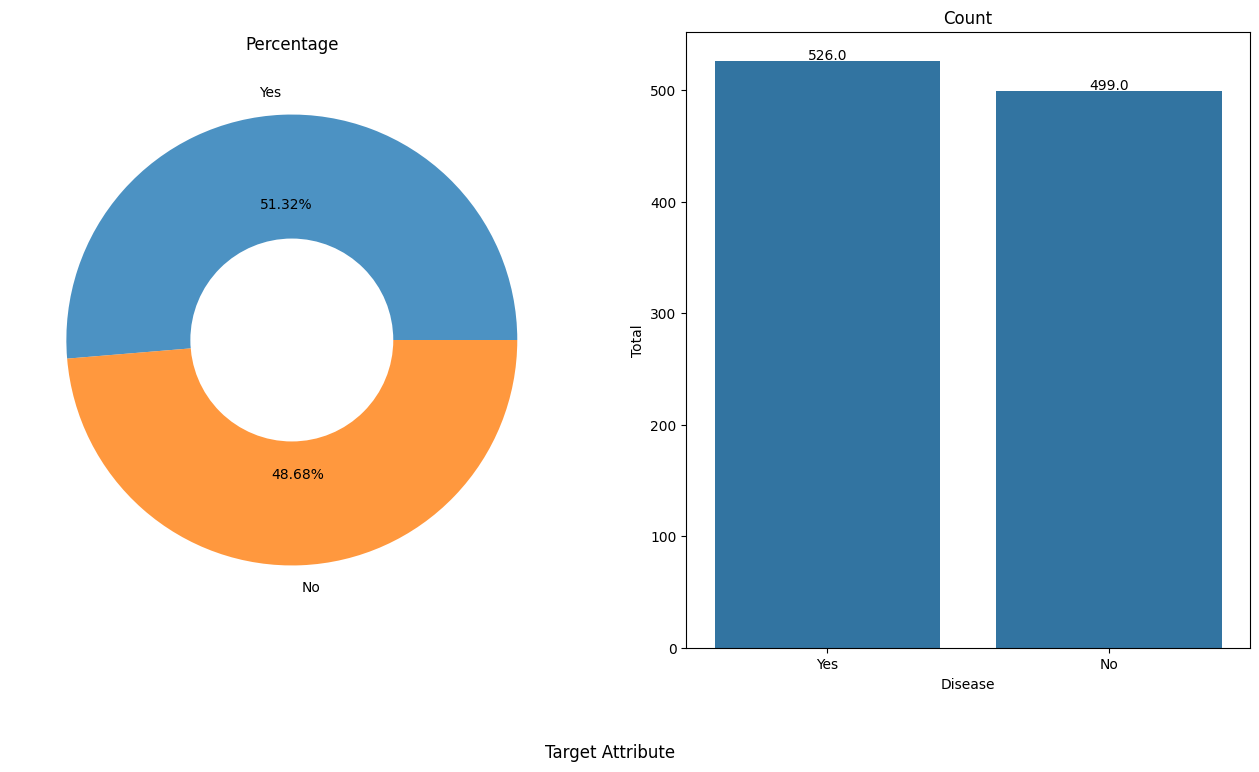

In [10]:
labels=['Yes', 'No']
order=dataset['target'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Target Attribute',y=-0.01)

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Percentage')
plt.pie(dataset['target'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

countplt = plt.subplot(1,2,2)
plt.title('Count')
ax= sns.countplot(x='target',data=dataset,order=order)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.xlabel('Disease')
plt.xticks([0,1],['Yes','No'])

plt.ylabel('Total')
countplt

print("The problem statement is of binary classification and the graphs show that there is no need of handling imbalance in terms of output(target) variable\n")
# Count Categorical Labels without dropping Null Values
print('\n Target Class: \n')
dataset.target.value_counts(dropna=False)



 Gender: 



sex
1    713
0    312
Name: count, dtype: int64

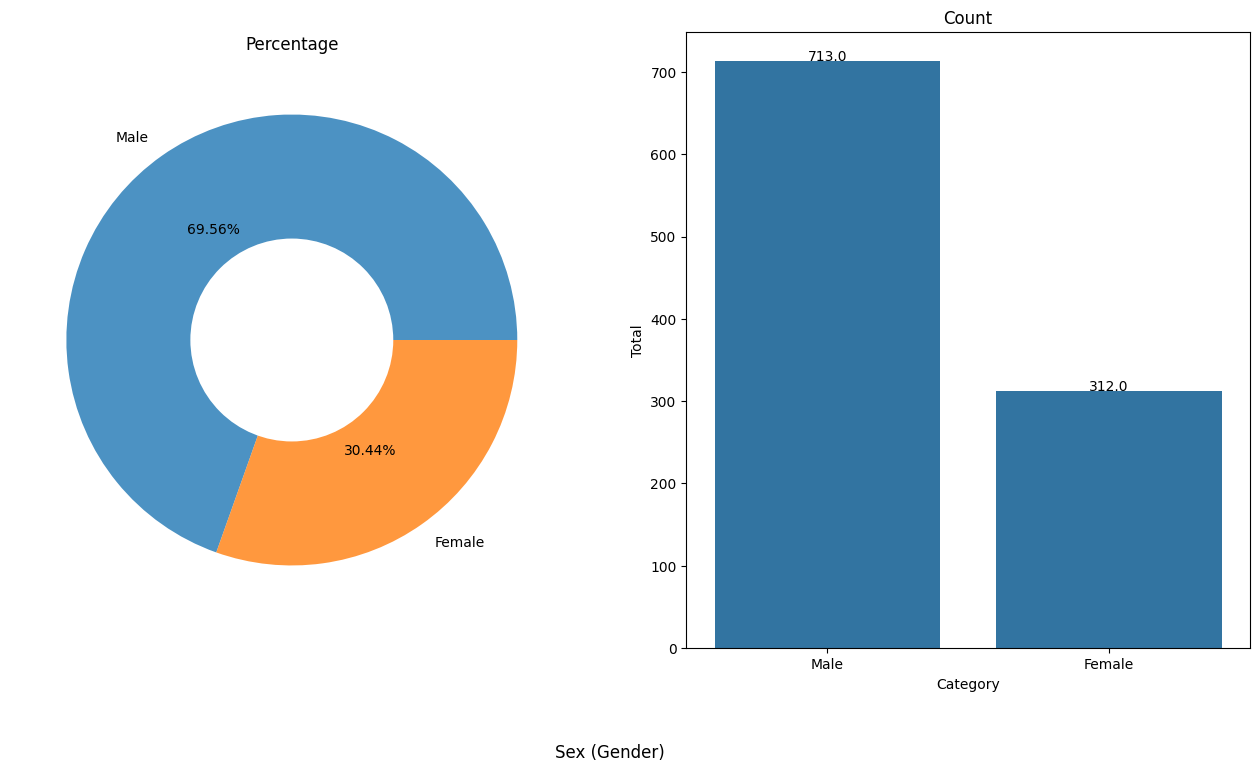

In [11]:
labels=['Male','Female']
order=dataset['sex'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Sex (Gender)',y=-0.01)

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Percentage')
plt.pie(dataset['sex'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Count')
ax= sns.countplot(x='sex',data=dataset,order=order)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)
# plt.xlabel('Gender')
plt.xticks([0,1],['Male','Female'])
plt.xlabel('Category')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Gender: \n')
dataset.sex.value_counts(dropna=False)



 Chest Pain Type Total: 



cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

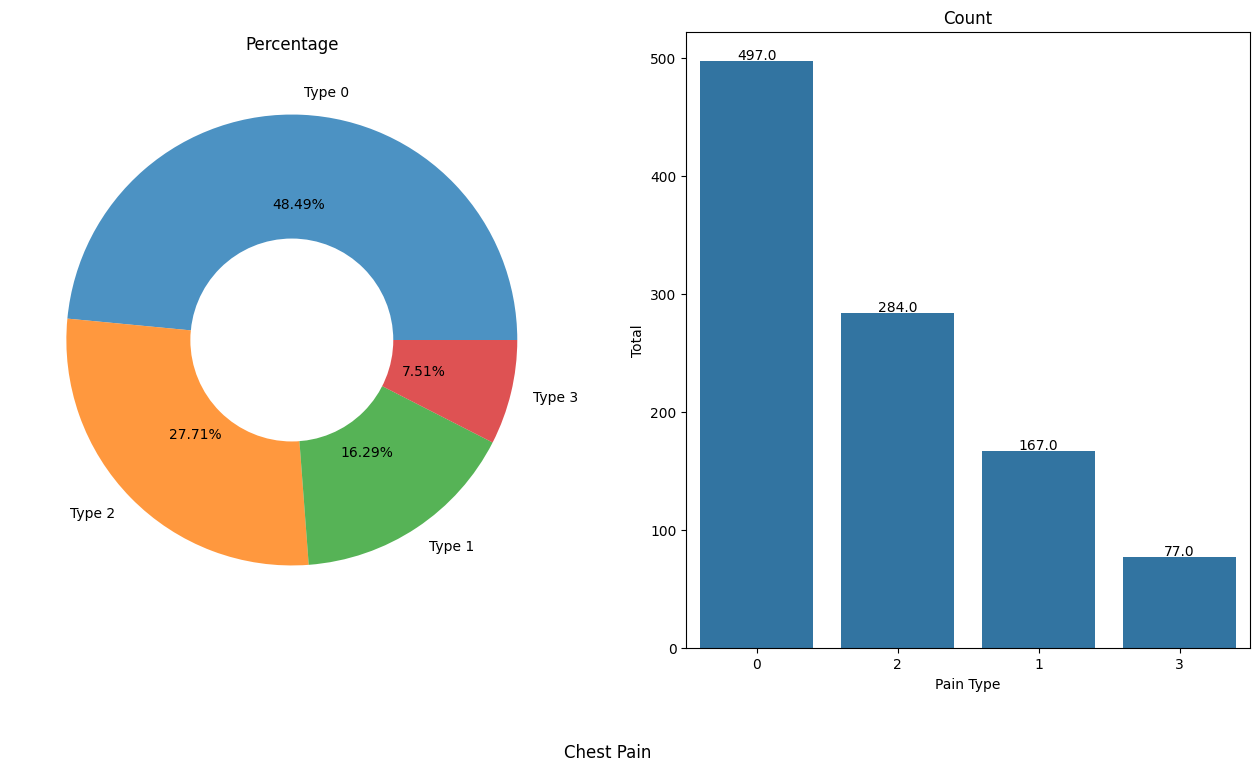

In [12]:
labels=['Type 0', 'Type 2', 'Type 1', 'Type 3']
order=dataset['cp'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Chest Pain ',y=-0.01)

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Percentage')
plt.pie(dataset['cp'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Count')
ax= sns.countplot(x='cp',data=dataset,order=order)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.xlabel('Pain Type')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Chest Pain Type Total: \n')
dataset.cp.value_counts(dropna=False)
# print()


 Fasting Blood Sugar:  



fbs
0    872
1    153
Name: count, dtype: int64

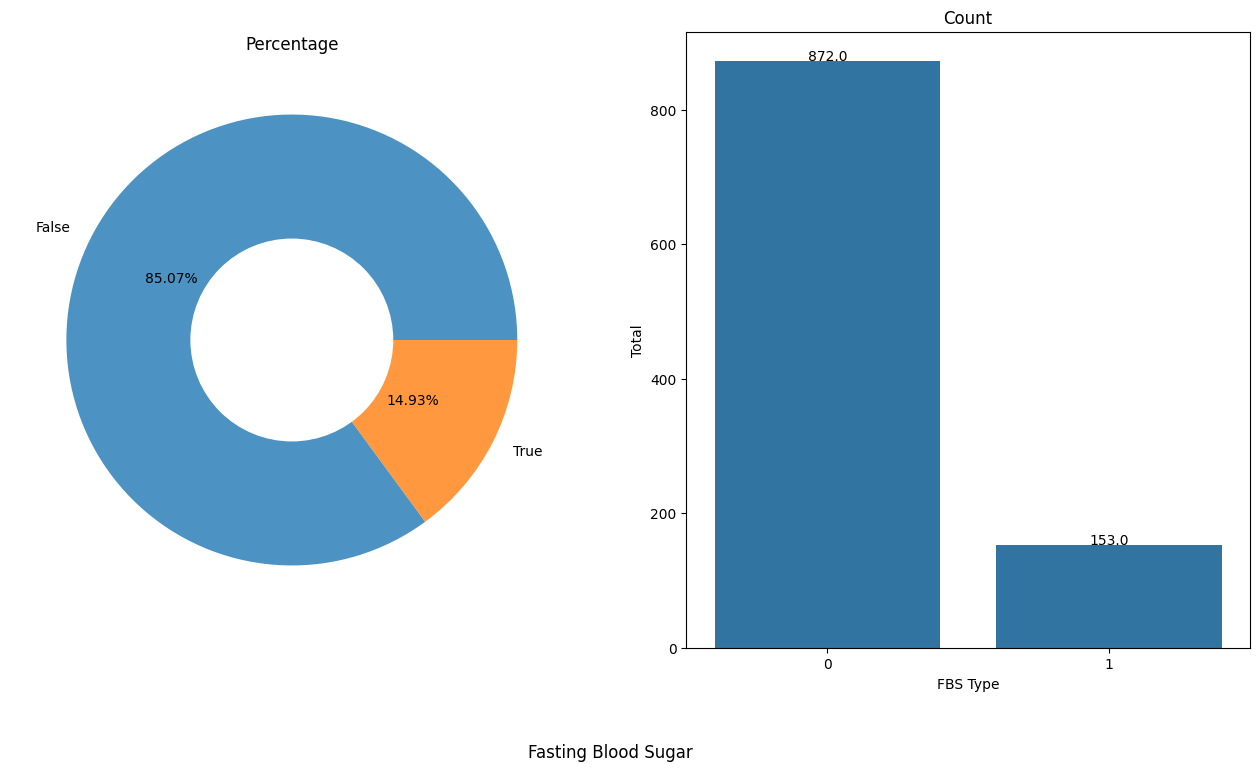

In [13]:
labels=['False', 'True']
order=dataset['fbs'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Fasting Blood Sugar',y=-0.01)

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Percentage')
plt.pie(dataset['fbs'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

countplt = plt.subplot(1,2,2)
plt.title('Count')
ax= sns.countplot(x='fbs',data=dataset,order=order)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.xlabel('FBS Type')
plt.ylabel('Total')
countplt


# Count Categorical Labels without dropping Null Values
print('\n Fasting Blood Sugar:  \n')
dataset.fbs.value_counts(dropna=False)
# p


 Number of Resting  Electrocardiographic values: 



restecg
1    513
0    497
2     15
Name: count, dtype: int64

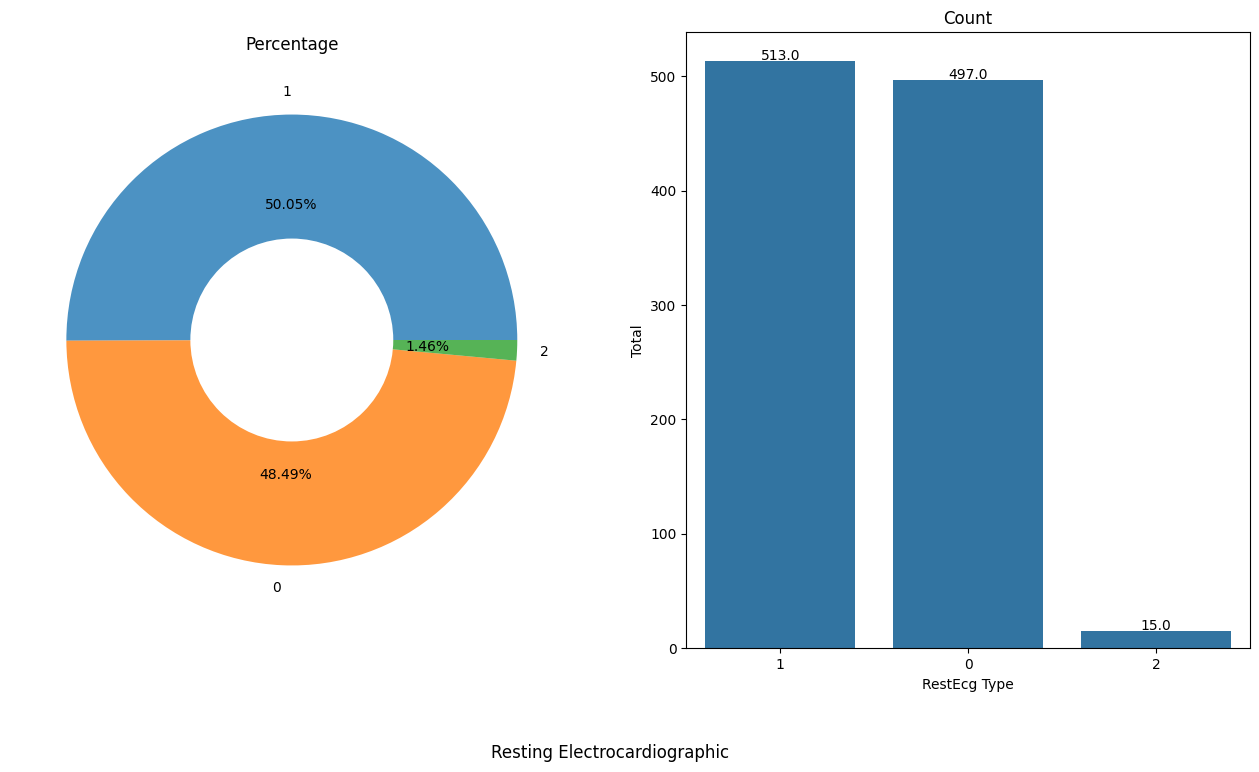

In [14]:
labels=['1', '0', '2']
order=dataset['restecg'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Resting Electrocardiographic',y=-0.01)

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Percentage')
plt.pie(dataset['restecg'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Count')
ax= sns.countplot(x='restecg',data=dataset,order=order)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.xlabel('RestEcg Type')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Number of Resting  Electrocardiographic values: \n')
dataset.restecg.value_counts(dropna=False)
# p



 Exercise Induced Angina Total 



exang
0    680
1    345
Name: count, dtype: int64

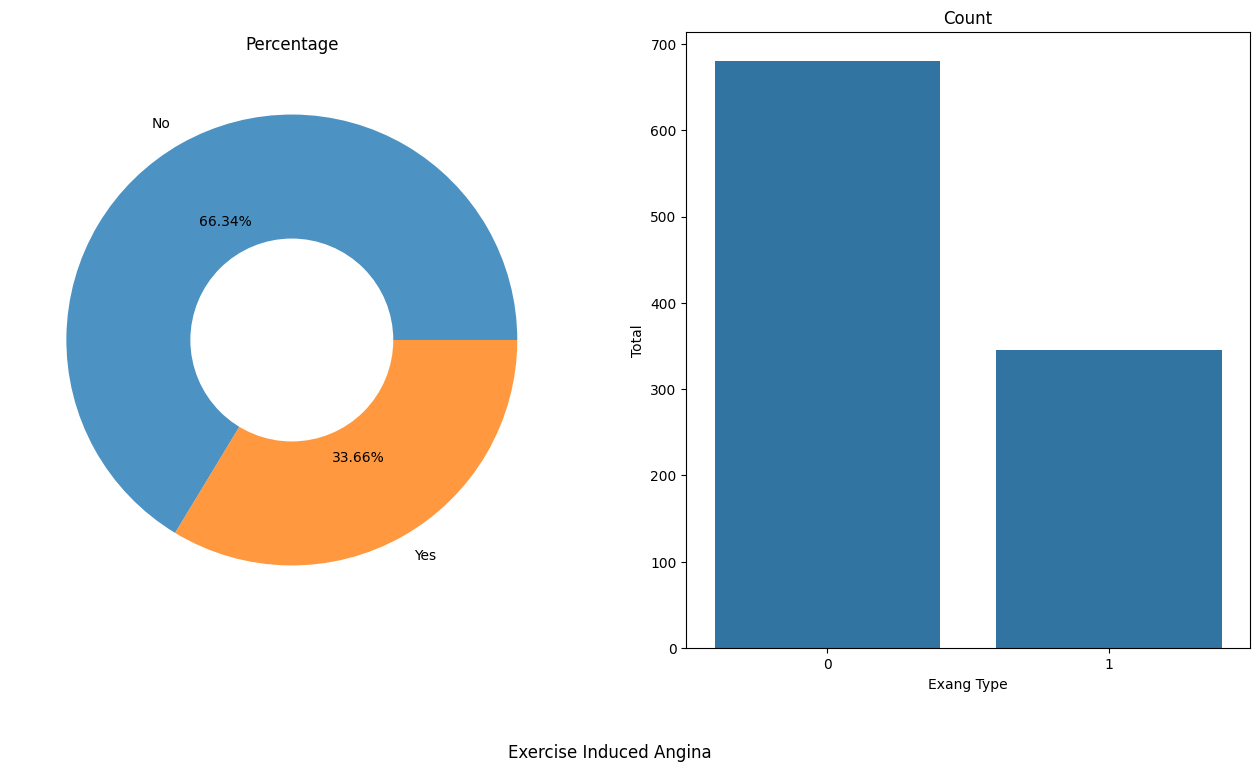

In [15]:
labels=['No', 'Yes']
order=dataset['exang'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Exercise Induced Angina',y=-0.01)

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Percentage')
plt.pie(dataset['exang'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Count')
ax= sns.countplot(x='exang',data=dataset,order=order)
plt.xlabel('Exang Type')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Exercise Induced Angina Total \n')
dataset.exang.value_counts(dropna=False)
# print()


 Slope values 



slope
1    482
2    469
0     74
Name: count, dtype: int64

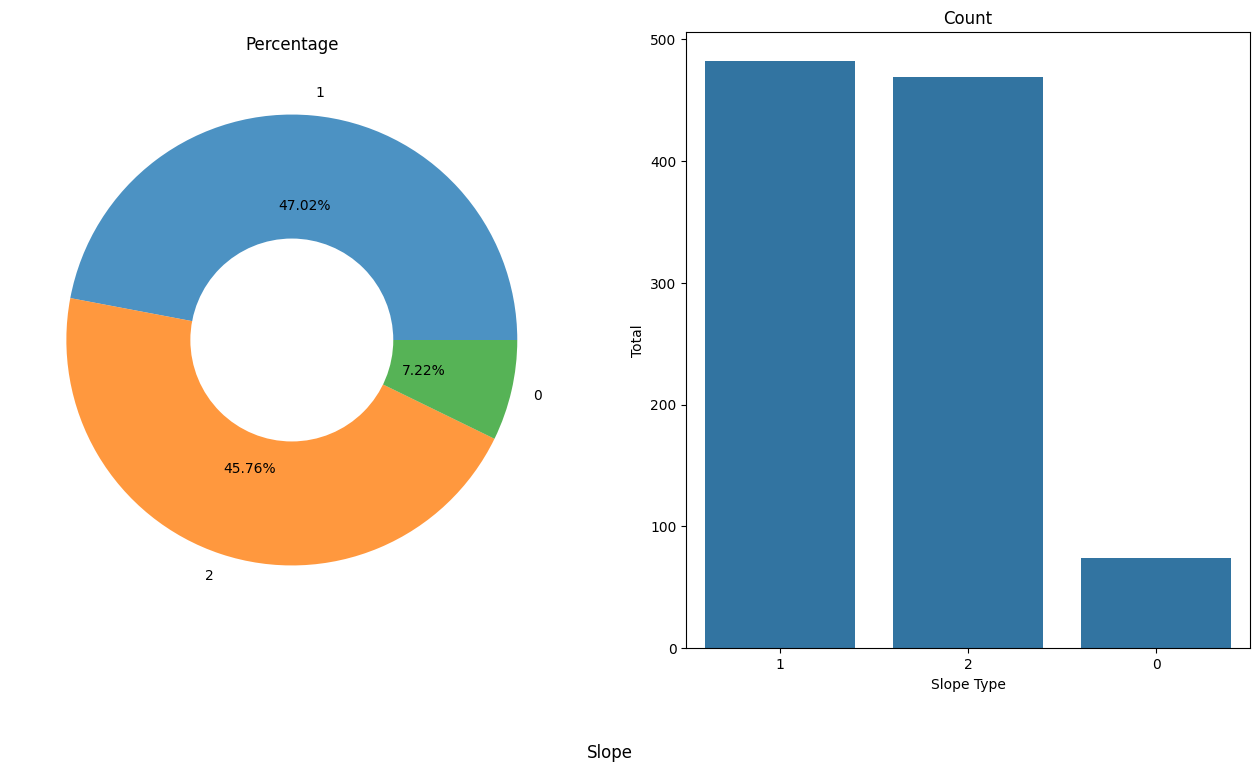

In [16]:
labels=['1','2','0']
order=dataset['slope'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Slope',y=-0.01)

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Percentage')
plt.pie(dataset['slope'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Count')
ax= sns.countplot(x='slope',data=dataset,order=order)
plt.xlabel('Slope Type')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Slope values \n')
dataset.slope.value_counts(dropna=False)
# print()


 Number of Major Vessels:  



ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64

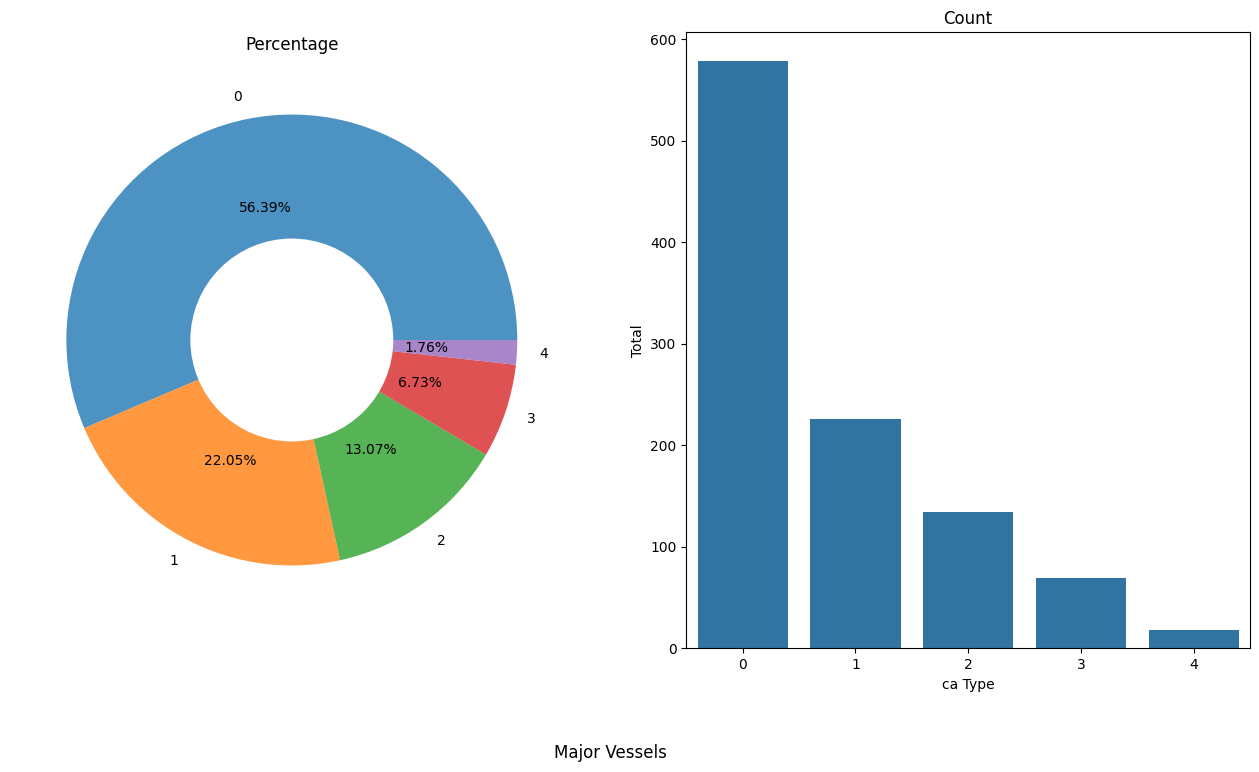

In [17]:
labels=['0', '1', '2', '3', '4']
order=dataset['ca'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Major Vessels',y=-0.01)

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Percentage')
plt.pie(dataset['ca'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Count')
ax= sns.countplot(x='ca',data=dataset,order=order)
plt.xlabel('ca Type')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Number of Major Vessels:  \n')
dataset.ca.value_counts(dropna=False)
# print()


 Number of Major Vessels Total  



thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64

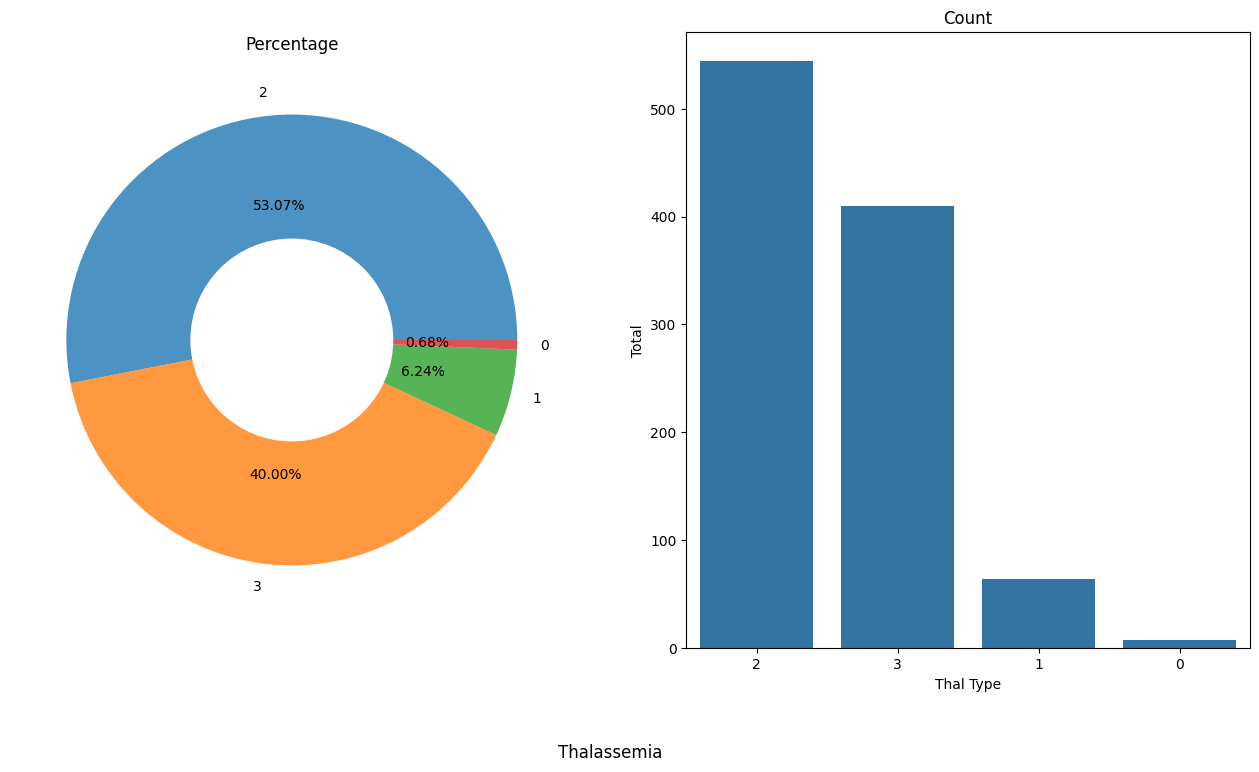

In [18]:
labels=['2','3','1','0']
order=dataset['thal'].value_counts().index

# Size for Both Figures
plt.figure(figsize= (16,8))
plt.suptitle('Thalassemia',y=-0.01)

# Subplot 1 Pie Chart
plt.subplot(1,2,1)
plt.title('Percentage')
plt.pie(dataset['thal'].value_counts(),labels=labels, autopct='%.2f%%', wedgeprops=dict(alpha=0.8))
centre=plt.Circle((0, 0), 0.45, fc='white')
plt.gcf().gca().add_artist(centre)

#Subplot 2 Histogram
countplt = plt.subplot(1,2,2)
plt.title('Count')
ax= sns.countplot(x='thal',data=dataset,order=order)
plt.xlabel('Thal Type')
plt.ylabel('Total')
countplt

# Count Categorical Labels without dropping Null Values
print('\n Number of Major Vessels Total  \n')
dataset.thal.value_counts(dropna=False)
# print()

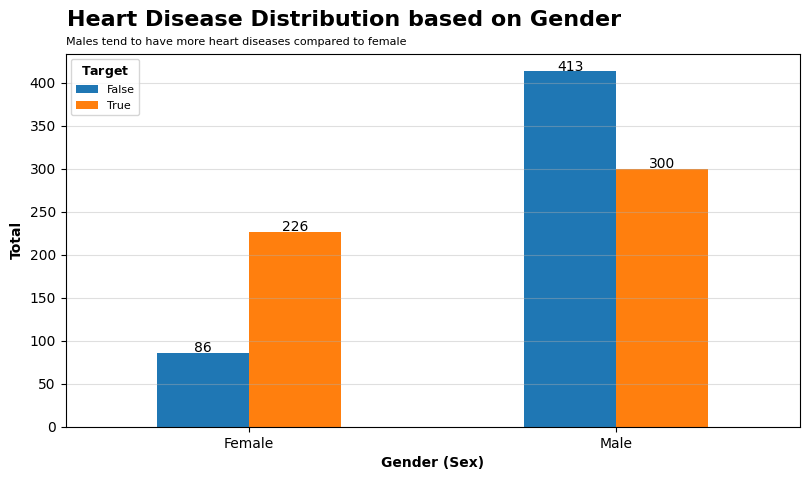

In [19]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Female', 'Male']


# --- Creating Bar Chart ---
ax = pd.crosstab(dataset.sex, dataset.target).plot(kind='bar', figsize=(8, 5))


# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.suptitle('Heart Disease Distribution based on Gender', fontweight='heavy', 
             x=0.065, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')
plt.title('Males tend to have more heart diseases compared to female',fontsize='8', fontfamily='sans-serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Gender (Sex)', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);

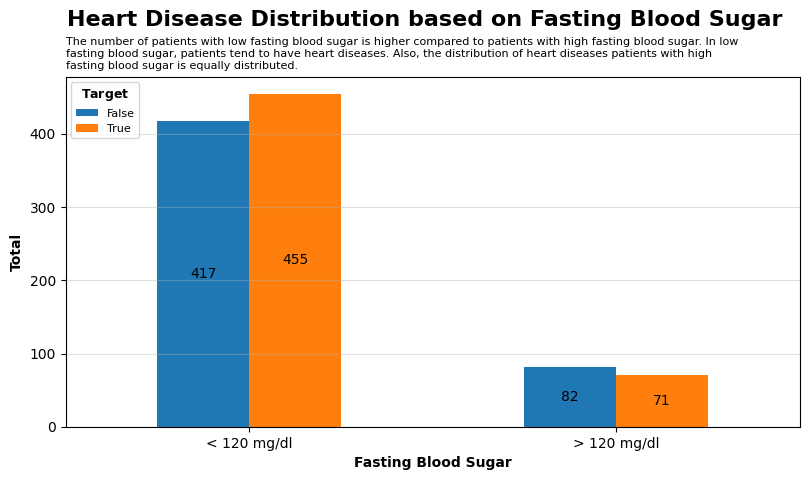

In [20]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['< 120 mg/dl', '> 120 mg/dl']

# --- Creating Bar Chart ---
ax = pd.crosstab(dataset.fbs, dataset.target).plot(kind='bar', figsize=(8, 5))

# --- Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(height), 
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Fasting Blood Sugar', 
             fontweight='heavy', x=0.065, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif')

plt.title('The number of patients with low fasting blood sugar is higher compared to patients with high fasting blood sugar. In low\nfasting blood sugar, patients tend to have heart diseases. Also, the distribution of heart diseases patients with high\nfasting blood sugar is equally distributed.', 
          fontsize='8', fontfamily='sans-serif', loc='left')

plt.tight_layout(rect=[0, 0.04, 1, 1.025])

plt.xlabel('Fasting Blood Sugar', fontfamily='sans-serif', fontweight='bold')

plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True)

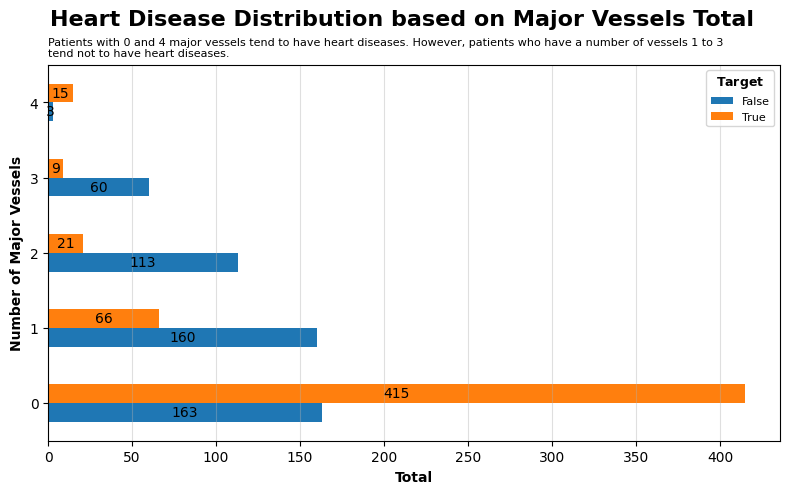

In [21]:
labels = ['False', 'True']

# --- Creating Horizontal Bar Chart ---
ax = pd.crosstab(dataset.ca, dataset.target).plot(kind='barh', figsize=(8, 5))

# --- Horizontal Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(width), 
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Major Vessels Total', 
             fontweight='heavy', x=0.069, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif')
plt.title('Patients with 0 and 4 major vessels tend to have heart diseases. However, patients who have a number of vessels 1 to 3\ntend not to have heart diseases.', 
          fontsize='8', fontfamily='sans-serif', loc='left')

plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Number of Major Vessels', fontfamily='sans-serif', fontweight='bold')
plt.yticks(rotation=0)
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', frameon=True,
           title_fontsize='9', loc='upper right')

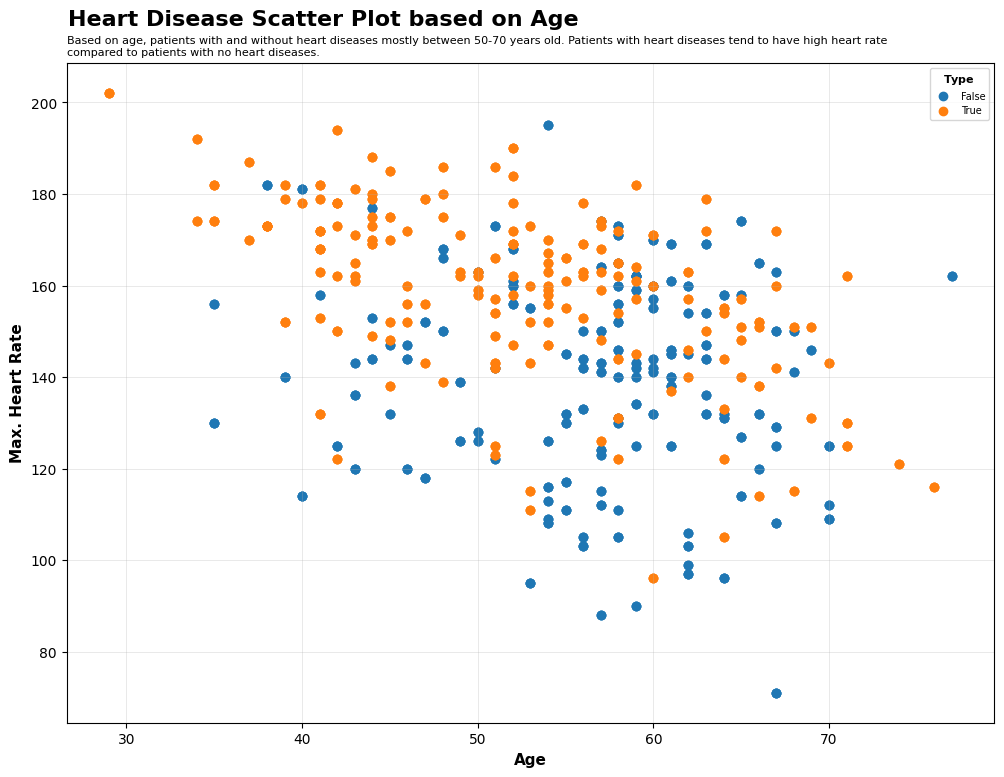

In [22]:
# -- Scatter Plot Size & Titles Settings ---
plt.figure(figsize=(10, 8))
plt.suptitle('Heart Disease Scatter Plot based on Age', fontweight='heavy', 
             x=0.048, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')

plt.title('Based on age, patients with and without heart diseases mostly between 50-70 years old. Patients with heart diseases tend to have high heart rate\ncompared to patients with no heart diseases.', 
          fontsize='8', fontfamily='sans-serif', loc='left')

plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Creating Scatter Plot ---
plt.scatter(x=dataset.age[dataset.target==0], y=dataset.thalach[(dataset.target==0)])
plt.scatter(x=dataset.age[dataset.target==1], y=dataset.thalach[(dataset.target==1)])

# --- Scatter Plot Legend & Labels Settings ---
plt.legend(['False', 'True'], title='$\\bf{Type}$', fontsize='7', 
           title_fontsize='8', loc='upper right', frameon=True)

plt.xlabel('Age', fontweight='bold', fontsize='11',
           fontfamily='sans-serif')

plt.ylabel('Max. Heart Rate', fontweight='bold', fontsize='11', 
           fontfamily='sans-serif')

plt.ticklabel_format(style='plain', axis='both')
plt.grid(axis='both', alpha=0.4, lw=0.5)
plt.show()

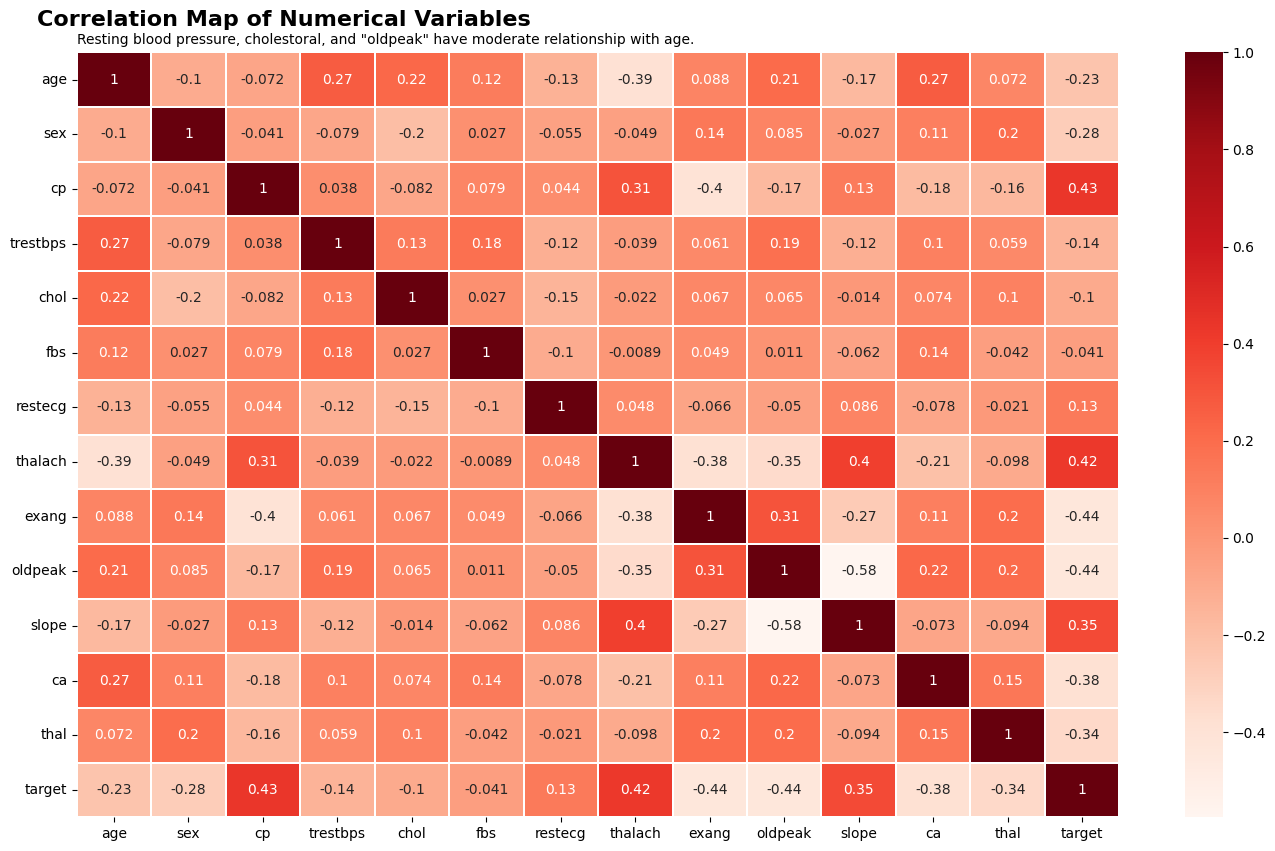

In [23]:
plt.figure(figsize=(14, 9))

sns.heatmap(dataset.corr(), annot=True, cmap='Reds', linewidths=0.1)

plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')

plt.title('Resting blood pressure, cholestoral, and "oldpeak" have moderate relationship with age.', 
          fontsize='10', fontfamily='sans-serif', loc='left')
plt.tight_layout(rect=[0, 0.04, 1, 1.01])


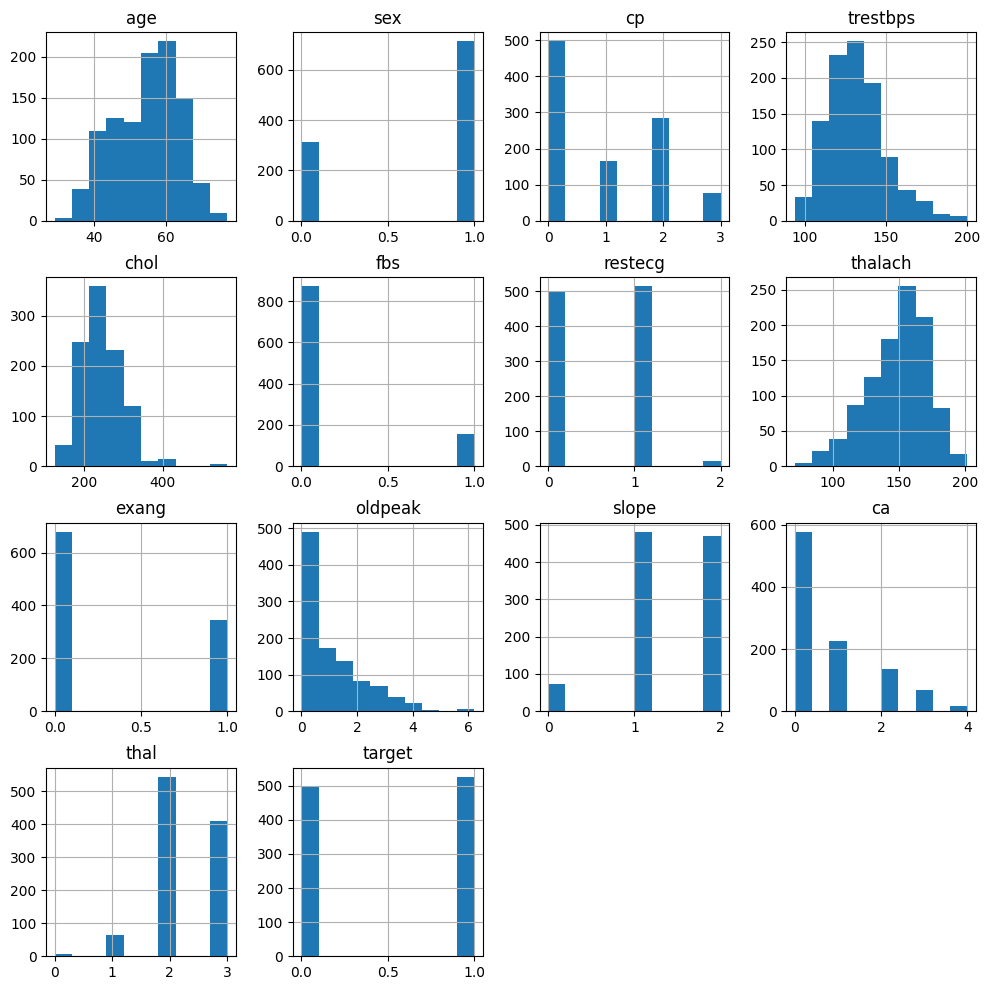

In [24]:
dataset.hist(figsize = (12, 12))
plt.show()

In [25]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Preprocessing Stage

## Taking care of missing values

In [26]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [27]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [28]:
dataset.shape

(1025, 14)

In [29]:
cate_val = []
cont_val = []
for column in dataset.columns:
    if dataset[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [30]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [31]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

## Encoding Categorical Data

In [32]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [33]:
dataset['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [34]:
cate_val.remove('sex')
cate_val.remove('target')
dataset = pd.get_dummies(dataset,columns = cate_val,drop_first=True)

In [35]:
dataset

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,164,0.0,1,True,False,False,...,True,False,True,False,False,False,False,False,True,False
1021,60,1,125,258,141,2.8,0,False,False,False,...,True,True,False,True,False,False,False,False,False,True
1022,47,1,110,275,118,1.0,0,False,False,False,...,True,True,False,True,False,False,False,False,True,False
1023,50,0,110,254,159,0.0,1,False,False,False,...,False,False,True,False,False,False,False,False,True,False


# Splitting Dataset

In [36]:
X = dataset.drop('target',axis=1)
y = dataset['target']

In [37]:
X

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,False,False,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,164,0.0,True,False,False,False,...,True,False,True,False,False,False,False,False,True,False
1021,60,1,125,258,141,2.8,False,False,False,False,...,True,True,False,True,False,False,False,False,False,True
1022,47,1,110,275,118,1.0,False,False,False,False,...,True,True,False,True,False,False,False,False,True,False
1023,50,0,110,254,159,0.0,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [38]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [39]:
X.shape, y.shape

((1025, 22), (1025,))

In [40]:
X_train,X_test,y_train,y_test=train_test_split( X,y,test_size=.2,random_state=0)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((820, 22), (205, 22), (820,), (205,))

# Feature Scaling 

In [41]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train[cont_val] = st.fit_transform(X_train[cont_val])
X_test[cont_val] = st.transform(X_test[cont_val])

In [42]:
X_train.shape , X_test.shape

((820, 22), (205, 22))

# Model Metrics

In [43]:
def model_metrics(p):
    print("Model Metrics for Testing")
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y_test,p)
    print("Confusion Matrix")
    print(cm)
    from sklearn.metrics import classification_report
    print(classification_report(y_test,p))

In [44]:
def model_metrics_training(t):
    print("Model Metrics for Training")
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y_train, t)
    print("Confusion Matrix")
    print(cm)
    from sklearn.metrics import classification_report
    print(classification_report(y_train,t))

# Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train,y_train)

y_pred_lr_nb = lr.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score

score_lr = round(accuracy_score(y_pred_lr_nb,y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 90.24 %


In [47]:
model_metrics(y_pred_lr_nb)

Model Metrics for Testing
Confusion Matrix
[[ 84  14]
 [  6 101]]
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        98
           1       0.88      0.94      0.91       107

    accuracy                           0.90       205
   macro avg       0.91      0.90      0.90       205
weighted avg       0.90      0.90      0.90       205



### Metrics for Training (LR)

In [48]:
# Use the trained model to make predictions on the training set
y_train_pred_lr = lr.predict(X_train)
model_metrics_training(y_train_pred_lr)

Model Metrics for Training
Confusion Matrix
[[337  64]
 [ 44 375]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       401
           1       0.85      0.89      0.87       419

    accuracy                           0.87       820
   macro avg       0.87      0.87      0.87       820
weighted avg       0.87      0.87      0.87       820



# Naive bayes

In [49]:
!pip install xgboost

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense

In [51]:
nb = GaussianNB()

nb.fit(X_train,y_train)

y_pred_nb_nb = nb.predict(X_test)

In [52]:
score_nb = round(accuracy_score(y_pred_nb_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 86.83 %


In [53]:
model_metrics(y_pred_nb_nb)

Model Metrics for Testing
Confusion Matrix
[[79 19]
 [ 8 99]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.85        98
           1       0.84      0.93      0.88       107

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



In [54]:
nb_tr1=nb.score(X_train, y_train) * 100
print("Naive Bayes Training Accuracy : {:.2f}%".format(nb_tr1))
nb_te1=nb.score(X_test, y_test) * 100
print("Naive Bayes Testing Accuracy : {:.2f}%".format(nb_te1))

Naive Bayes Training Accuracy : 83.78%
Naive Bayes Testing Accuracy : 86.83%


### Training  Model metrics for Naive Bayes

In [55]:
# Use the trained model to make predictions on the training set
y_train_pred_nb = nb.predict(X_train)
model_metrics_training(y_train_pred_nb)

Model Metrics for Training
Confusion Matrix
[[328  73]
 [ 60 359]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       401
           1       0.83      0.86      0.84       419

    accuracy                           0.84       820
   macro avg       0.84      0.84      0.84       820
weighted avg       0.84      0.84      0.84       820



# SVM

In [56]:
from sklearn import svm

svm = svm.SVC()

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

In [57]:
score_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 92.2 %


In [58]:
model_metrics(y_pred_svm)

Model Metrics for Testing
Confusion Matrix
[[ 87  11]
 [  5 102]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        98
           1       0.90      0.95      0.93       107

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



In [59]:
svm_tr1=svm.score(X_train, y_train) * 100
print("SVM Training Accuracy : {:.2f}%".format(svm_tr1))
svm_te1=svm.score(X_test, y_test) * 100
print("Support Vector Machine Testing Accuracy: {:.2f}%".format(svm_te1))

SVM Training Accuracy : 94.88%
Support Vector Machine Testing Accuracy: 92.20%


### Training Model metrics for  (SVM)

In [60]:
# Use the trained model to make predictions on the training set
y_train_pred_svm = svm.predict(X_train)
model_metrics_training(y_train_pred_svm)

Model Metrics for Training
Confusion Matrix
[[375  26]
 [ 16 403]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       401
           1       0.94      0.96      0.95       419

    accuracy                           0.95       820
   macro avg       0.95      0.95      0.95       820
weighted avg       0.95      0.95      0.95       820



# KNN

In [61]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

In [62]:
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 86.34 %


In [63]:
knn_tr1=knn.score(X_train, y_train) * 100
print("KNN Accuracy Training Accuracy : {:.2f}%".format(knn_tr1))
knn_te1=knn.score(X_test, y_test) * 100
print("KNN Model Testing Accuracy: {:.2f}%".format(knn_te1))

KNN Accuracy Training Accuracy : 90.61%
KNN Model Testing Accuracy: 86.34%


In [64]:
model_metrics(y_pred_knn)

Model Metrics for Testing
Confusion Matrix
[[79 19]
 [ 9 98]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        98
           1       0.84      0.92      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



### Training Model metrics for KNN

In [65]:
# Use the trained model to make predictions on the training set
y_train_pred_knn = knn.predict(X_train)
model_metrics_training(y_train_pred_knn)

Model Metrics for Training
Confusion Matrix
[[364  37]
 [ 40 379]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       401
           1       0.91      0.90      0.91       419

    accuracy                           0.91       820
   macro avg       0.91      0.91      0.91       820
weighted avg       0.91      0.91      0.91       820



# ANN- MULTI LAYER PERCEPTRON

In [66]:
# 2 - 98.54
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(random_state=2)
nn_model.fit(X_train, y_train)
y_pred5 = nn_model.predict(X_test)
print(nn_model.score(X_train, y_train))


0.9878048780487805


c:\Users\keert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [67]:
model_metrics(y_pred5)

Model Metrics for Testing
Confusion Matrix
[[ 96   2]
 [  1 106]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        98
           1       0.98      0.99      0.99       107

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [68]:
nn_tr1 = nn_model.score(X_train, y_train) * 100
print("Neural Network Training Accuracy : {:.2f}%".format(nn_tr1))
nn_te1 = nn_model.score(X_test, y_test) * 100
print("Neural Network Testing Accuracy: {:.2f}%".format(nn_te1))

Neural Network Training Accuracy : 98.78%
Neural Network Testing Accuracy: 98.54%


### Training Model Metrics for the ANN

In [69]:
# Use the trained model to make predictions on the training set
y_train_pred_ann = nn_model.predict(X_train)
model_metrics_training(y_train_pred_ann)

Model Metrics for Training
Confusion Matrix
[[396   5]
 [  5 414]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       401
           1       0.99      0.99      0.99       419

    accuracy                           0.99       820
   macro avg       0.99      0.99      0.99       820
weighted avg       0.99      0.99      0.99       820



# CNN - without feature selection

In [70]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [71]:
X_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
315,-1.405034,1,0.947890,-0.058677,1.258177,-0.212795,False,False,True,False,...,False,False,True,False,True,False,False,False,True,False
204,1.262700,0,0.832696,0.595166,0.128065,-0.928291,False,True,False,False,...,False,True,False,True,False,False,False,False,True,False
363,-0.182322,1,-0.088854,-0.020216,1.040848,-0.928291,False,True,False,True,...,False,False,True,False,False,True,False,False,True,False
5,0.373456,0,-1.816760,0.018246,-1.175910,-0.033921,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1017,-0.182322,1,-0.492032,0.672089,-2.349489,0.860450,False,False,False,False,...,True,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,-0.626945,1,-0.780016,-1.885593,-1.002047,-0.212795,False,True,False,False,...,False,False,True,False,False,True,False,False,True,False
192,1.373856,0,-0.952807,6.095144,0.475792,0.502702,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True
629,1.151545,1,0.371921,0.672089,1.084314,0.323827,False,False,True,True,...,False,True,False,True,False,False,False,False,True,False
559,1.373856,1,-0.664822,-0.193292,-3.392669,-0.033921,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [72]:
X_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
807,-1.182722,1,-0.088854,-0.270215,1.301643,-0.570543,False,True,False,False,...,True,False,True,False,False,False,False,False,True,False
27,0.373456,0,0.256728,1.383625,0.128065,-0.928291,True,False,False,True,...,False,False,True,False,True,False,False,False,True,False
77,0.929234,1,0.487115,-1.154826,-0.219662,2.649190,False,False,False,False,...,True,False,True,False,True,False,False,False,False,True
406,0.373456,1,0.487115,-0.693290,0.693121,-0.928291,False,True,False,True,...,False,False,True,False,False,False,False,False,True,False
886,0.706922,1,-0.664822,0.249014,-0.393525,2.291442,False,False,False,False,...,True,True,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,-1.293878,0,-0.549629,-0.654829,0.693121,-0.749417,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
320,-0.182322,0,-0.088854,0.325937,-0.263127,-0.570543,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
362,-1.293878,0,-0.549629,-0.654829,0.693121,-0.749417,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
452,1.262700,0,2.675796,-0.366368,0.693121,-0.033921,False,False,False,True,...,True,True,False,False,True,False,False,False,False,True


In [73]:
X_train = X_train.reshape((-1, X_train.shape[1], 1))
X_test = X_test.reshape((-1, X_test.shape[1], 1))


AttributeError: 'DataFrame' object has no attribute 'reshape'

In [ ]:
X_test

array([[[ 0.83316836],
        [-1.52752523],
        [-0.91672034],
        ...,
        [ 1.00526437],
        [-0.7254674 ],
        [-0.54519316]],

       [[-0.1492222 ],
        [-1.52752523],
        [ 1.008275  ],
        ...,
        [ 1.00526437],
        [-0.7254674 ],
        [-3.85673683]],

       [[ 0.06908682],
        [ 0.65465367],
        [-0.91672034],
        ...,
        [-0.64007851],
        [ 0.24025219],
        [ 1.11057867]],

       ...,

       [[-1.13161275],
        [ 0.65465367],
        [ 1.008275  ],
        ...,
        [ 1.00526437],
        [-0.7254674 ],
        [-0.54519316]],

       [[ 0.72401385],
        [ 0.65465367],
        [-0.91672034],
        ...,
        [ 1.00526437],
        [ 0.24025219],
        [ 1.11057867]],

       [[ 0.39655033],
        [ 0.65465367],
        [ 1.008275  ],
        ...,
        [-0.64007851],
        [ 0.24025219],
        [ 1.11057867]]])

In [ ]:
# Create a CNN model
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 128)               1792      
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
import numpy as np

X_train = np.array(X_train).astype('float32')
X_test = np.array(X_test).astype('float32')


In [ ]:
pred_train = model.predict(X_train)
print(type(pred_train))
print(pred_train.shape)
print(pred_train[:5])


26/26 [==============================] - 1s 3ms/step
<class 'numpy.ndarray'>
(820, 1)
[[0.5091244 ]
 [0.50399554]
 [0.5060183 ]
 [0.51490587]
 [0.5174857 ]]


In [ ]:
# Train the model on the training set
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20


26/26 [==============================] - 2s 20ms/step - loss: 0.6560 - accuracy: 0.6610 - val_loss: 0.5774 - val_accuracy: 0.8195
Epoch 2/20
26/26 [==============================] - 0s 6ms/step - loss: 0.5160 - accuracy: 0.7829 - val_loss: 0.3810 - val_accuracy: 0.8537
Epoch 3/20
26/26 [==============================] - 0s 5ms/step - loss: 0.3990 - accuracy: 0.8207 - val_loss: 0.3034 - val_accuracy: 0.8683
Epoch 4/20
26/26 [==============================] - 0s 7ms/step - loss: 0.3520 - accuracy: 0.8500 - val_loss: 0.2642 - val_accuracy: 0.8780
Epoch 5/20
26/26 [==============================] - 0s 7ms/step - loss: 0.3358 - accuracy: 0.8488 - val_loss: 0.2505 - val_accuracy: 0.8976
Epoch 6/20
26/26 [==============================] - 0s 6ms/step - loss: 0.3162 - accuracy: 0.8573 - val_loss: 0.2410 - val_accuracy: 0.9024
Epoch 7/20
26/26 [==============================] - 0s 7ms/step - loss: 0.3017 - accuracy: 0.8634 - val_loss: 0.2254 - val_accuracy: 0.9220
Epoch 8/20
26/26 

In [ ]:
# Use the trained model to make predictions on the training and testing sets
# y_train_pred = model.predict_classes(X_train)
# predict_x=model.predict(X_test) 
# classes_x=np.argmax(predict_x,axis=1)
# y_test_pred = model.predict_classes(X_test)


# y_train_pred =  np.argmax(model.predict(X_train), axis=-1)
y_train_pred = (model.predict(X_train) > 0.5).astype("int32")


# y_test_pred = np.argmax(model.predict(X_test), axis=-1)
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")

7/7 [==============================] - 0s 4ms/step


In [ ]:
# Calculate and print the confusion matrices for the training and testing sets
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

In [ ]:
print("Confusion matrix for the training set:")
print(train_cm)

Confusion matrix for the training set:
[[389  12]
 [ 21 398]]


In [ ]:
print("\nConfusion matrix for the testing set:")
print(test_cm)


Confusion matrix for the testing set:
[[ 92   6]
 [  6 101]]


In [ ]:
# Calculate and print the training and testing accuracy
train_loss, cnn_train_acc1 = model.evaluate(X_train, y_train)
print("Training Accuracy:", cnn_train_acc1)

test_loss, cnn_test_acc1 = model.evaluate(X_test, y_test)
print("Testing Accuracy:", cnn_test_acc1)

26/26 [==============================] - 0s 4ms/step - loss: 0.1367 - accuracy: 0.9598
Training Accuracy: 0.959756076335907
7/7 [==============================] - 0s 5ms/step - loss: 0.1404 - accuracy: 0.9415
Testing Accuracy: 0.9414634108543396


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Print the classification report for the training set
print("Classification Report for the Training Set:")
print(classification_report(y_train, y_train_pred))

Classification Report for the Training Set:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       401
           1       0.97      0.95      0.96       419

    accuracy                           0.96       820
   macro avg       0.96      0.96      0.96       820
weighted avg       0.96      0.96      0.96       820



In [ ]:
# Print the classification report for the testing set
print("\nClassification Report for the Testing Set:")
print(classification_report(y_test, y_test_pred))


Classification Report for the Testing Set:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        98
           1       0.94      0.94      0.94       107

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



Algorithm

## Boruta is a feature selection technique that uses a backward elimination approach.

In Boruta, all the candidate features are initially evaluated using a random forest classifier, and the importance scores of each feature are obtained. Then, a shadow feature set is created by randomly permuting the values of the original features. This shadow feature set is used to estimate the importance of the features under the null hypothesis that they are not relevant.

Boruta then iteratively removes the features that are deemed not significantly different from their corresponding shadow features until only the relevant features remain. This backward elimination process continues until the remaining set of features is statistically significant.

Therefore, Boruta does not use a forward selection approach like some other feature selection techniques such as sequential feature selection.



### Basically installed our most awaited guest Boruta

In [ ]:
!pip install boruta

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

### Importing Dataset

In [ ]:
dataset = pd.read_csv("heart.csv")

In [ ]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### -Spillting the dataset into independent X and dependent feature y

In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
X.shape

(1025, 13)

In [ ]:
forest = RandomForestClassifier(n_estimators=50, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
 
# find all relevant features
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	11
Tentative: 	0
Rejected: 	2


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	11
Tentative: 	0
Rejected: 	2


BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=50, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x163D253F740),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x163D253F740, verbose=2)

In [ ]:
most_important = dataset.columns[:-1][feat_selector.support_].tolist()
most_important

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

### creating a new dataset by only including the most important feature and dropping the least important

In [ ]:
dataset1 = dataset.drop(columns= ["restecg","fbs"])

In [ ]:
dataset1

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,168,0,1.0,2,2,3,0
1,53,1,0,140,203,155,1,3.1,0,0,3,0
2,70,1,0,145,174,125,1,2.6,0,0,3,0
3,61,1,0,148,203,161,0,0.0,2,1,3,0
4,62,0,0,138,294,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,159,0,0.0,2,0,2,1


In [ ]:
dataset1.shape

(1025, 12)

#  Data preprocessing stage

Now here in our dataset we had several catogoraical feature we just directly cannot fed such variable to the Machine learning model,because the ML model will misinterpret it so here I'm using one of the most well known technique called One-Hot Encoding.

###  segregating the categorical features and (numerical)Constant value features

In [ ]:
cate_val = []
cont_val = []
for column in dataset1.columns:
    if dataset1[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [ ]:
# categorical features
cate_val

['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [ ]:
# Non-categoraical(numerical) feature
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### EcoDing Categorical Data using .get_dummies() method

In [ ]:
cate_val

['sex', 'cp', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
dataset1['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [ ]:
cate_val.remove('sex')
cate_val.remove('target')
dataset1 = pd.get_dummies(dataset1,columns = cate_val,drop_first=True)

In [ ]:
dataset1

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,164,0.0,1,True,False,False,True,False,True,False,False,False,False,False,True,False
1021,60,1,125,258,141,2.8,0,False,False,False,True,True,False,True,False,False,False,False,False,True
1022,47,1,110,275,118,1.0,0,False,False,False,True,True,False,True,False,False,False,False,True,False
1023,50,0,110,254,159,0.0,1,False,False,False,False,False,True,False,False,False,False,False,True,False


## Spilting the dataset into independent X and depented feature y

In [ ]:
X = dataset1.drop('target',axis=1)
y = dataset1['target']

## Splitting the dataset into the training and testing

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=0)
X_train.shape,X_test.shape

((820, 19), (205, 19))

# Feature Scaling stage

Feature scaling is used in machine learning to normalize the input features of a dataset so that they have a similar scale or range. This helps avoid bias, improve model performance, reduce computational complexity, and facilitate interpretation, leading to more accurate and efficient models.

Here, I had used the StandardScaler feature scaling techinique.
The StandardScaler is a popular feature scaling technique in machine learning that transforms the input features of a dataset to have zero mean and unit variance. This ensures that all features contribute equally to the analysis and helps avoid bias towards features with larger scales.

In [ ]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X_train[cont_val] = st.fit_transform(X_train[cont_val])
X_test[cont_val] = st.transform(X_test[cont_val])

In [ ]:
X_test.shape

(205, 22)

In [ ]:
X_train.shape

(820, 22)

# VARIOUS MODELS TRAINED:
 

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

score_lr_wb = round(accuracy_score(y_pred_lr,y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr_wb)+" %")

The accuracy score achieved using Logistic Regression is: 90.73 %


In [ ]:
model_metrics(y_pred_lr)

Model Metrics for Testing
Confusion Matrix
[[ 85  13]
 [  6 101]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        98
           1       0.89      0.94      0.91       107

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



In [ ]:
lr_tr2 = lr.score(X_train, y_train) * 100
print("Logistic Regression Training Accuracy : {:.2f}%".format(lr_tr2))
lr_te2 = lr.score(X_test, y_test) * 100
print("Logistic Regression Testing Accuracy : {:.2f}%".format(lr_te2))

Logistic Regression Training Accuracy : 87.93%
Logistic Regression Testing Accuracy : 90.73%


In [ ]:
# Use the trained model to make predictions on the training set
y_train_pred_lr = lr.predict(X_train)
model_metrics_training(y_train_pred_lr)

Model Metrics for Training
Confusion Matrix
[[342  59]
 [ 40 379]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       401
           1       0.87      0.90      0.88       419

    accuracy                           0.88       820
   macro avg       0.88      0.88      0.88       820
weighted avg       0.88      0.88      0.88       820



# Naive Bayes

In [ ]:
nb = GaussianNB()

nb.fit(X_train,y_train)

y_pred_nb = nb.predict(X_test)

In [ ]:
score_nb_wb = round(accuracy_score(y_pred_nb,y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb_wb)+" %")

The accuracy score achieved using Naive Bayes is: 87.8 %


In [ ]:
model_metrics(y_pred_nb)

Model Metrics for Testing
Confusion Matrix
[[84 14]
 [11 96]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        98
           1       0.87      0.90      0.88       107

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



In [ ]:
nb_tr2 = nb.score(X_train, y_train) * 100
print("Naive Bayes Accuracy Training Accuracy : {:.2f}%".format(nb_tr2))
nb_te2 = nb.score(X_test, y_test) * 100
print("Naive Bayes Testing Accuracy: {:.2f}%".format(nb_te2))

Naive Bayes Accuracy Training Accuracy : 83.54%
Naive Bayes Testing Accuracy: 87.80%


In [ ]:
# Use the trained model to make predictions on the training set
y_train_pred_nb = nb.predict(X_train)
model_metrics_training(y_train_pred_nb)

Model Metrics for Training
Confusion Matrix
[[336  65]
 [ 70 349]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       401
           1       0.84      0.83      0.84       419

    accuracy                           0.84       820
   macro avg       0.84      0.84      0.84       820
weighted avg       0.84      0.84      0.84       820



# SVM

In [ ]:
from sklearn import svm

svm = svm.SVC()

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

In [ ]:
score_svm_wb = round(accuracy_score(y_pred_svm,y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm_wb)+" %")

The accuracy score achieved using Linear SVM is: 93.17 %


In [ ]:
model_metrics(y_pred_svm)

Model Metrics for Testing
Confusion Matrix
[[ 87  11]
 [  3 104]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        98
           1       0.90      0.97      0.94       107

    accuracy                           0.93       205
   macro avg       0.94      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



In [ ]:
svm_tr2 = svm.score(X_train, y_train) * 100
print("SVM Training Accuracy : {:.2f}%".format(svm_tr2))
svm_te2 = svm.score(X_test, y_test) * 100
print("Support Vector Machine Testing Accuracy: {:.2f}%".format(svm_te2))

SVM Training Accuracy : 94.63%
Support Vector Machine Testing Accuracy: 93.17%


In [ ]:
# Use the trained model to make predictions on the training set
y_train_pred_svm = svm.predict(X_train)
model_metrics_training(y_train_pred_svm)

Model Metrics for Training
Confusion Matrix
[[375  26]
 [ 18 401]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94       401
           1       0.94      0.96      0.95       419

    accuracy                           0.95       820
   macro avg       0.95      0.95      0.95       820
weighted avg       0.95      0.95      0.95       820



# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

In [ ]:
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 86.34 %


In [ ]:
model_metrics(y_pred_knn)

Model Metrics for Testing
Confusion Matrix
[[78 20]
 [ 8 99]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



In [ ]:
knn_tr2 = knn.score(X_train, y_train) * 100
print("KNN Accuracy Training Accuracy : {:.2f}%".format(knn_tr2))
knn_te2 = knn.score(X_test, y_test) * 100
print("KNN Model Testing Accuracy: {:.2f}%".format(knn_te2))

KNN Accuracy Training Accuracy : 89.51%
KNN Model Testing Accuracy: 86.34%


In [ ]:
# Use the trained model to make predictions on the training set
y_train_pred_knn = knn.predict(X_train)
model_metrics_training(y_train_pred_knn)

Model Metrics for Training
Confusion Matrix
[[362  39]
 [ 47 372]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       401
           1       0.91      0.89      0.90       419

    accuracy                           0.90       820
   macro avg       0.90      0.90      0.90       820
weighted avg       0.90      0.90      0.90       820



# ANN

In [ ]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(random_state=2)
nn_model.fit(X_train, y_train)
y_pred5 = nn_model.predict(X_test)
# print(nn_model.score(X_train, y_train))

c:\Users\keert\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
model_metrics(y_pred5)

Model Metrics for Testing
Confusion Matrix
[[ 96   2]
 [  1 106]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        98
           1       0.98      0.99      0.99       107

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
nn_tr2 = nn_model.score(X_train, y_train) * 100
print("Neural Network Training Accuracy : {:.2f}%".format(nn_tr2))
nn_te2 = nn_model.score(X_test, y_test) * 100
print("Neural Network Testing Accuracy: {:.2f}%".format(nn_te2))

Neural Network Training Accuracy : 97.68%
Neural Network Testing Accuracy: 91.22%


In [ ]:
import pickle
pickle.dump(nn_model, open('model_wcc.pkl', 'wb'))

In [ ]:
# Use the trained model to make predictions on the training set
y_train_pred_ann = nn_model.predict(X_train)
model_metrics_training(y_train_pred_ann)

Model Metrics for Training
Confusion Matrix
[[386  11]
 [  8 415]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       397
           1       0.97      0.98      0.98       423

    accuracy                           0.98       820
   macro avg       0.98      0.98      0.98       820
weighted avg       0.98      0.98      0.98       820



## CNN Model

#### Importing the neccesary libaraies

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [ ]:
import numpy as np

In [ ]:
X_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
315,-1.405034,1,0.947890,-0.058677,1.258177,-0.212795,False,False,True,False,False,True,False,True,False,False,False,True,False
204,1.262700,0,0.832696,0.595166,0.128065,-0.928291,False,True,False,False,True,False,True,False,False,False,False,True,False
363,-0.182322,1,-0.088854,-0.020216,1.040848,-0.928291,False,True,False,False,False,True,False,False,True,False,False,True,False
5,0.373456,0,-1.816760,0.018246,-1.175910,-0.033921,False,False,False,False,True,False,False,False,False,False,False,True,False
1017,-0.182322,1,-0.492032,0.672089,-2.349489,0.860450,False,False,False,True,True,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,-0.626945,1,-0.780016,-1.885593,-1.002047,-0.212795,False,True,False,False,False,True,False,False,True,False,False,True,False
192,1.373856,0,-0.952807,6.095144,0.475792,0.502702,False,True,False,False,True,False,False,False,False,False,False,False,True
629,1.151545,1,0.371921,0.672089,1.084314,0.323827,False,False,True,False,True,False,True,False,False,False,False,True,False
559,1.373856,1,-0.664822,-0.193292,-3.392669,-0.033921,False,False,False,False,True,False,False,False,False,False,False,True,False


In [ ]:
X_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
807,-1.182722,1,-0.088854,-0.270215,1.301643,-0.570543,False,True,False,True,False,True,False,False,False,False,False,True,False
27,0.373456,0,0.256728,1.383625,0.128065,-0.928291,True,False,False,False,False,True,False,True,False,False,False,True,False
77,0.929234,1,0.487115,-1.154826,-0.219662,2.649190,False,False,False,True,False,True,False,True,False,False,False,False,True
406,0.373456,1,0.487115,-0.693290,0.693121,-0.928291,False,True,False,False,False,True,False,False,False,False,False,True,False
886,0.706922,1,-0.664822,0.249014,-0.393525,2.291442,False,False,False,True,True,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,-1.293878,0,-0.549629,-0.654829,0.693121,-0.749417,False,True,False,False,True,False,False,False,False,False,False,True,False
320,-0.182322,0,-0.088854,0.325937,-0.263127,-0.570543,False,False,False,False,True,False,False,False,False,False,False,True,False
362,-1.293878,0,-0.549629,-0.654829,0.693121,-0.749417,False,True,False,False,True,False,False,False,False,False,False,True,False
452,1.262700,0,2.675796,-0.366368,0.693121,-0.033921,False,False,False,True,True,False,False,True,False,False,False,False,True


CNN

This code is used in a Convolutional Neural Network (CNN) to reshape the input data into the appropriate format required for 1D convolutional layers to operate on it. 

In a CNN, the input data is expected to be in the form of a tensor with dimensions `(batch_size, sequence_length, num_channels)`. The `X_train.values.reshape((-1, X_train.shape[1], 1))` code reshapes the input data into a 3D tensor with dimensions `(num_samples, num_features, num_channels)`, where `num_features` corresponds to the length of the input sequence and `num_channels` corresponds to the number of input features (in this case, it is set to 1).

By reshaping the input data in this way, we can feed it into a 1D convolutional layer in a CNN, which can then learn to extract relevant features from the input sequence. The convolutional layer slides a small window (called a filter or kernel) over the input sequence, performing a dot product between the filter weights and the input at each step to produce a new sequence of output values. This operation is repeated with multiple filters to extract different features from the input sequence.

Overall, reshaping the input data in this way is an important step in preparing data for use in a 1D CNN, which is a powerful tool for sequence-based data analysis.

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (820, 19)
X_test shape: (205, 19)


In [ ]:
X_train = X_train.reshape((-1, X_train.shape[1], 1))
X_test = X_test.reshape((-1, X_test.shape[1], 1))



In [ ]:
# Create a CNN model
model = Sequential()
model.add(Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model on the training set
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
26/26 [==============================] - 0s 9ms/step - loss: 0.1212 - accuracy: 0.9659 - val_loss: 0.1253 - val_accuracy: 0.9561
Epoch 2/20
26/26 [==============================] - 0s 7ms/step - loss: 0.1140 - accuracy: 0.9695 - val_loss: 0.1110 - val_accuracy: 0.9610
Epoch 3/20
26/26 [==============================] - 0s 5ms/step - loss: 0.1122 - accuracy: 0.9646 - val_loss: 0.1039 - val_accuracy: 0.9756
Epoch 4/20
26/26 [==============================] - 0s 5ms/step - loss: 0.0960 - accuracy: 0.9744 - val_loss: 0.1028 - val_accuracy: 0.9707
Epoch 5/20
26/26 [==============================] - 0s 5ms/step - loss: 0.0804 - accuracy: 0.9829 - val_loss: 0.0938 - val_accuracy: 0.9805
Epoch 6/20
26/26 [==============================] - 0s 6ms/step - loss: 0.0817 - accuracy: 0.9841 - val_loss: 0.1184 - val_accuracy: 0.9561
Epoch 7/20
26/26 [==============================] - 0s 6ms/step - loss: 0.0817 - accuracy: 0.9756 - val_loss: 0.0796 - val_accuracy: 0.9707
Epoch 8/20
26/26 [==

In [ ]:
#
import numpy as np

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)


In [ ]:
#
X_train = np.stack(X_train).astype("float32")
X_test = np.stack(X_test).astype("float32")


In [ ]:
#
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


In [ ]:
print(X_train.shape)
print(X_train.dtype)


(820, 19, 1)
float32


In [ ]:
# Train the model on the training set
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
26/26 [==============================] - 2s 20ms/step - loss: 0.6212 - accuracy: 0.7341 - val_loss: 0.5159 - val_accuracy: 0.8049
Epoch 2/20
26/26 [==============================] - 0s 8ms/step - loss: 0.4813 - accuracy: 0.7988 - val_loss: 0.3742 - val_accuracy: 0.8244
Epoch 3/20
26/26 [==============================] - 0s 6ms/step - loss: 0.3988 - accuracy: 0.8171 - val_loss: 0.3301 - val_accuracy: 0.8537
Epoch 4/20
26/26 [==============================] - 0s 6ms/step - loss: 0.3679 - accuracy: 0.8305 - val_loss: 0.2956 - val_accuracy: 0.8439
Epoch 5/20
26/26 [==============================] - 0s 7ms/step - loss: 0.3393 - accuracy: 0.8561 - val_loss: 0.2691 - val_accuracy: 0.8878
Epoch 6/20
26/26 [==============================] - 0s 7ms/step - loss: 0.3261 - accuracy: 0.8598 - val_loss: 0.2616 - val_accuracy: 0.8732
Epoch 7/20
26/26 [==============================] - 0s 7ms/step - loss: 0.3061 - accuracy: 0.8622 - val_loss: 0.2618 - val_accuracy: 0.8683
Epoch 8/20
26/26 [=

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 17, 32)            128       
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 8, 32)             0         
 g1D)                                                            
                                                                 
 conv1d_3 (Conv1D)           (None, 6, 64)             6208      
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 3, 64)             0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 192)               0         
                                                                 
 dense_2 (Dense)             (None, 64)               

In [ ]:
# Use the trained model to make predictions on the training and testing sets
# y_train_pred = model.predict_classes(X_train)
# y_test_pred = model.predict_classes(X_test)
# y_train_pred =  np.argmax(model.predict(X_train), axis=-1)
# y_test_pred = np.argmax(model.predict(X_test), axis=-1)

# y_train_pred =  np.argmax(model.predict(X_train), axis=-1)
y_train_pred = (model.predict(X_train) > 0.5).astype("int32")


# y_test_pred = np.argmax(model.predict(X_test), axis=-1)
y_test_pred = (model.predict(X_test) > 0.5).astype("int32")

7/7 [==============================] - 0s 3ms/step


In [ ]:
# Calculate and print the confusion matrices for the training and testing sets
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

In [ ]:
print("Confusion matrix for the training set:")
print(train_cm)

Confusion matrix for the training set:
[[395   6]
 [ 15 404]]


In [ ]:
print("\nConfusion matrix for the testing set:")
print(test_cm)


Confusion matrix for the testing set:
[[ 94   4]
 [  3 104]]


In [ ]:
# Calculate and print the training and testing accuracy
train_loss, cnn_train_acc2 = model.evaluate(X_train, y_train)
print("Training Accuracy:", cnn_train_acc2)

test_loss, cnn_test_acc2 = model.evaluate(X_test, y_test)
print("Testing Accuracy:", cnn_test_acc2)

26/26 [==============================] - 0s 1ms/step - loss: 0.0251 - accuracy: 0.9927
Training Accuracy: 0.992682933807373
7/7 [==============================] - 0s 8ms/step - loss: 0.0770 - accuracy: 0.9561
Testing Accuracy: 0.9560975432395935


In [ ]:
# Print the classification report for the training set
print("Classification Report for the Training Set:")
print(classification_report(y_train, y_train_pred))

Classification Report for the Training Set:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       397
           1       0.99      1.00      0.99       423

    accuracy                           0.99       820
   macro avg       0.99      0.99      0.99       820
weighted avg       0.99      0.99      0.99       820



In [ ]:
# Print the classification report for the training set
print("Classification Report for the Testing Set:")
print(classification_report(y_test, y_test_pred))

Classification Report for the Testing Set:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       102
           1       0.94      0.97      0.96       103

    accuracy                           0.96       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



# comparisons based on various metrics 

In [ ]:
ls_tr = (lr_tr1, nb_tr1, knn_tr1, svm_tr1, nn_tr1, cnn_train_acc1*100, lr_tr2, nb_tr2, knn_tr2, svm_tr2,nn_tr2,cnn_train_acc2*100)
ls_te = (lr_te1, nb_te1 ,knn_te1, svm_te1, nn_te1, cnn_test_acc1*100, lr_te1,nb_te2, knn_te2, svm_te2,nn_te2 ,cnn_test_acc2*100)

In [ ]:
print(ls_tr)
print(ls_te)

(86.82926829268293, 83.78048780487805, 90.60975609756098, 94.8780487804878, 98.78048780487805, 95.9756076335907, 87.92682926829268, 83.53658536585365, 89.51219512195122, 94.6341463414634, 98.41463414634146, 100.0)
(90.2439024390244, 86.82926829268293, 86.34146341463415, 92.19512195121952, 98.53658536585365, 94.14634108543396, 90.2439024390244, 87.8048780487805, 86.34146341463415, 93.17073170731707, 98.53658536585365, 100.0)


[ 0  1  2  3  4  5  6  7  8  9 10 11]


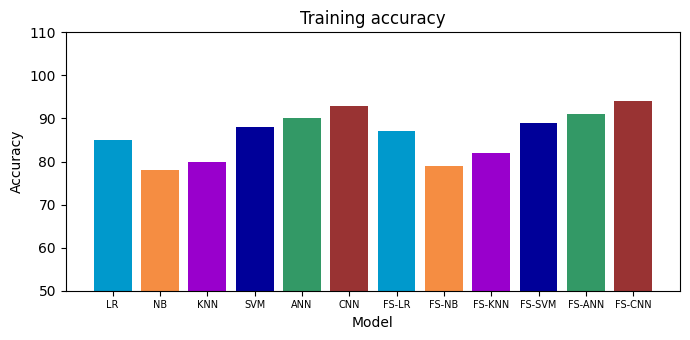

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
# Set the figure size
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
labels = ('LR','NB','KNN','SVM','ANN','CNN','FS-LR','FS-NB','FS-KNN','FS-SVM','FS-ANN','FS-CNN')
# List of data points
# data = [0, 1, 3, 2, 1, 5, 2, 1, 4, 2, 4, 0]
y_pos = np.arange(len(ls_tr))
print(y_pos)
# y_pos = [0,2,4,6,8,10,12,14,16,18,20,22]
# Plot bar chart with data points
plt.ylim(50,110)
plt.bar(y_pos,ls_tr,color=['#0099cc', '#f58d42', '#9900cc', '#000099', '#339966','#993333'])
plt.xticks(y_pos, labels,fontsize = 7)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training accuracy')
# Display the plot
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11]


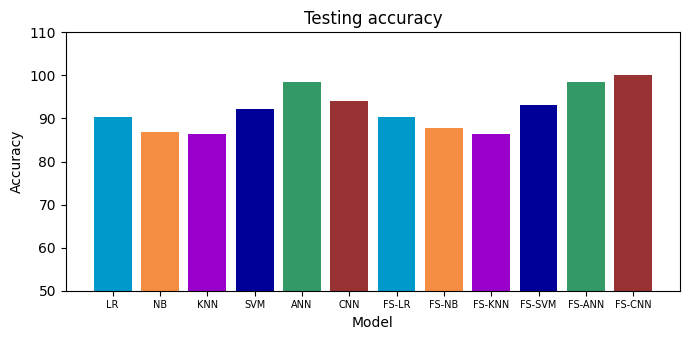

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
# Set the figure size
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
labels = ('LR','NB','KNN','SVM','ANN','CNN','FS-LR','FS-NB','FS-KNN','FS-SVM','FS-ANN','FS-CNN')
# List of data points
# data = [0, 1, 3, 2, 1, 5, 2, 1, 4, 2, 4, 0]
y_pos = np.arange(len(ls_tr))
print(y_pos)
# y_pos = [0,2,4,6,8,10,12,14,16,18,20,22]
# Plot bar chart with data points
plt.ylim(50,110)
plt.bar(y_pos,ls_te,color=['#0099cc', '#f58d42', '#9900cc', '#000099', '#339966','#993333'])
plt.xticks(y_pos, labels,fontsize = 7)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Testing accuracy')
# Display the plot
plt.show()

#Using KERAS AND TENSOR FLOW - MLP( DNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming your dataset is loaded into a Pandas DataFrame called 'df'
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the ANN model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.5),  # Increased dropout rate
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),  # Increased dropout rate
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=100, batch_size=32, 
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/100
26/26 [==============================] - 1s 10ms/step - loss: 0.6182 - accuracy: 0.6634 - val_loss: 0.4789 - val_accuracy: 0.7854
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 0.4550 - accuracy: 0.7890 - val_loss: 0.4159 - val_accuracy: 0.8244
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 0.3818 - accuracy: 0.8402 - val_loss: 0.4015 - val_accuracy: 0.8244
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 0.3633 - accuracy: 0.8390 - val_loss: 0.4009 - val_accuracy: 0.8146
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 0.3261 - accuracy: 0.8683 - val_loss: 0.3963 - val_accuracy: 0.8195
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 0.3213 - accuracy: 0.8561 - val_loss: 0.3845 - val_accuracy: 0.8293
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 0.3162 - accuracy: 0.8683 - val_loss: 0.3789 - val_accuracy: 0.8146
Epoch 8/100


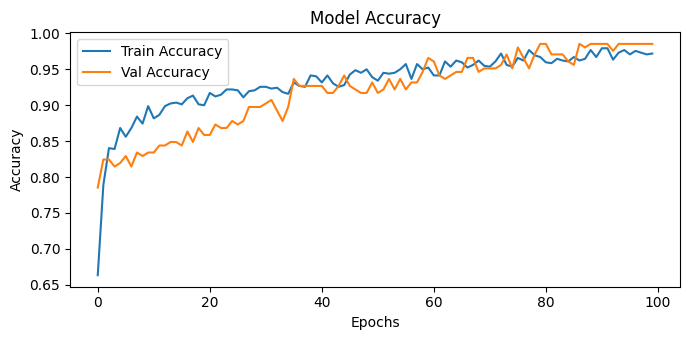

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

# Example: Load sample binary classification dataset
from sklearn.datasets import load_breast_cancer  # Replace with your dataset
data = load_breast_cancer()

X = data.data
y = data.target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input if needed (not required here, kept for consistency)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Define MLP model
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=X_train_reshaped.shape[1]))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of the model
model.summary()

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

# Train the model
history = model.fit(
    X_train_reshaped,
    y_train,
    epochs=300,
    validation_data=(X_test_reshaped, y_test),
    callbacks=[early_stopping]
)

# Predict on test data
model_pred = (model.predict(X_test_reshaped) > 0.5).astype(int).flatten()

# Evaluation
print("\nClassification Report:\n")
print(classification_report(y_test, model_pred))




Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 11)                341       
                                                                 
 dense_24 (Dense)            (None, 1)                 12        
                                                                 
Total params: 353 (1.38 KB)
Trainable params: 353 (1.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/300
15/15 [==============================] - 1s 18ms/step - loss: 48.8053 - accuracy: 0.6286 - val_loss: 41.9414 - val_accuracy: 0.6228
Epoch 2/300
15/15 [==============================] - 0s 6ms/step - loss: 32.8836 - accuracy: 0.6286 - val_loss: 25.3875 - val_accuracy: 0.6228
Epoch 3/300
15/15 [==============================] - 0s 6ms/step - loss: 16.9047 - accuracy: 0.6286 - val_loss: 8.7151 - val_accurac

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the model with 4 hidden layers
model = Sequential()
model.add(Dense(32, input_dim=13, activation='relu'))  # First hidden layer
model.add(Dense(16, activation='relu'))  # Second hidden layer
model.add(Dense(8, activation='relu'))  # Third hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy[1]:.4f}")


Epoch 1/100
26/26 [==============================] - 2s 14ms/step - loss: 0.6541 - accuracy: 0.7244 - val_loss: 0.6280 - val_accuracy: 0.7756
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 0.5805 - accuracy: 0.7927 - val_loss: 0.5630 - val_accuracy: 0.7805
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4897 - accuracy: 0.8476 - val_loss: 0.4944 - val_accuracy: 0.7707
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 0.4058 - accuracy: 0.8561 - val_loss: 0.4519 - val_accuracy: 0.7561
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 0.3518 - accuracy: 0.8610 - val_loss: 0.4319 - val_accuracy: 0.7659
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 0.3230 - accuracy: 0.8707 - val_loss: 0.4251 - val_accuracy: 0.7951
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 0.3041 - accuracy: 0.8768 - val_loss: 0.4092 - val_accuracy: 0.7951
Epoch 8/100


In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Load the dataset
try:
    data = pd.read_csv("heart.csv")
except FileNotFoundError:
    # Using a placeholder dataset (Iris dataset)
    data = df.copy()  # `df` is already loaded in the notebook

# Preprocessing
X = data.drop(columns=['target'])  # Features (excluding the target column)
y = data['target']  # Target variable

# Handling missing values if any
X.fillna(X.mean(), inplace=True)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the MLP model with 3 hidden layers
mlp_model = MLPClassifier(hidden_layer_sizes=(32,16,8), activation='relu', max_iter=1000, random_state=42)

# Train the model
mlp_model.fit(X_train, y_train)

# Make predictions
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


print(f"Testing Accuracy: {test_accuracy:.4f}")

train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix (Training):")
print(train_cm)

print("\nConfusion Matrix (Testing):")
print(test_cm)


Testing Accuracy: 0.9854
Confusion Matrix (Training):
[[397   0]
 [  0 423]]

Confusion Matrix (Testing):
[[102   0]
 [  3 100]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model  # Import plot_model

# Load the dataset
try:
    data = pd.read_csv("heart.csv")
except FileNotFoundError:
    # Using Iris dataset as a placeholder
    data = df.copy()  # `df` is already loaded in the notebook

# Preprocessing
X = data.drop(columns=['target'])  # Features (excluding the target column)
y = data['target']  # Target variable

# Handling missing values if any
X.fillna(X.mean(), inplace=True)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the model with 4 hidden layers
model = Sequential()
model.add(Dense(32, input_dim=13, activation='relu'))  # First hidden layer
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dense(32, activation='relu'))  # Third hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Print the architecture summary
model.summary()

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Generate and save the model architecture diagram
try:
    plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
except Exception as e:
    print(f"An error occurred while plotting the model: {e}")

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy[1]:.4f}")


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 32)                448       
                                                                 
 dense_26 (Dense)            (None, 64)                2112      
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4673 (18.25 KB)
Trainable params: 4673 (18.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
An error occurred while plotting the model: module 'pydot' has no attribute 'InvocationException'
Epoch 1/100
26/26 [==============================] - 1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# Load the dataset
data = pd.read_csv("heart.csv")  # Replace with the correct path to your dataset

# Define features and target
X = data.drop(columns=['target'])  # Features
y = data['target']  # Target variable

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the MLP model with 4 hidden layers
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dense(32, activation='relu'))  # Third hidden layer
model.add(Dense(16, activation='relu'))  # Fourth hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Print the architecture summary
model.summary()

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 64)                896       
                                                                 
 dense_30 (Dense)            (None, 64)                4160      
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dense_32 (Dense)            (None, 16)                528       
                                                                 
 dense_33 (Dense)            (None, 1)                 17        
                                                                 
Total params: 7681 (30.00 KB)
Trainable params: 7681 (30.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
26/26 [=

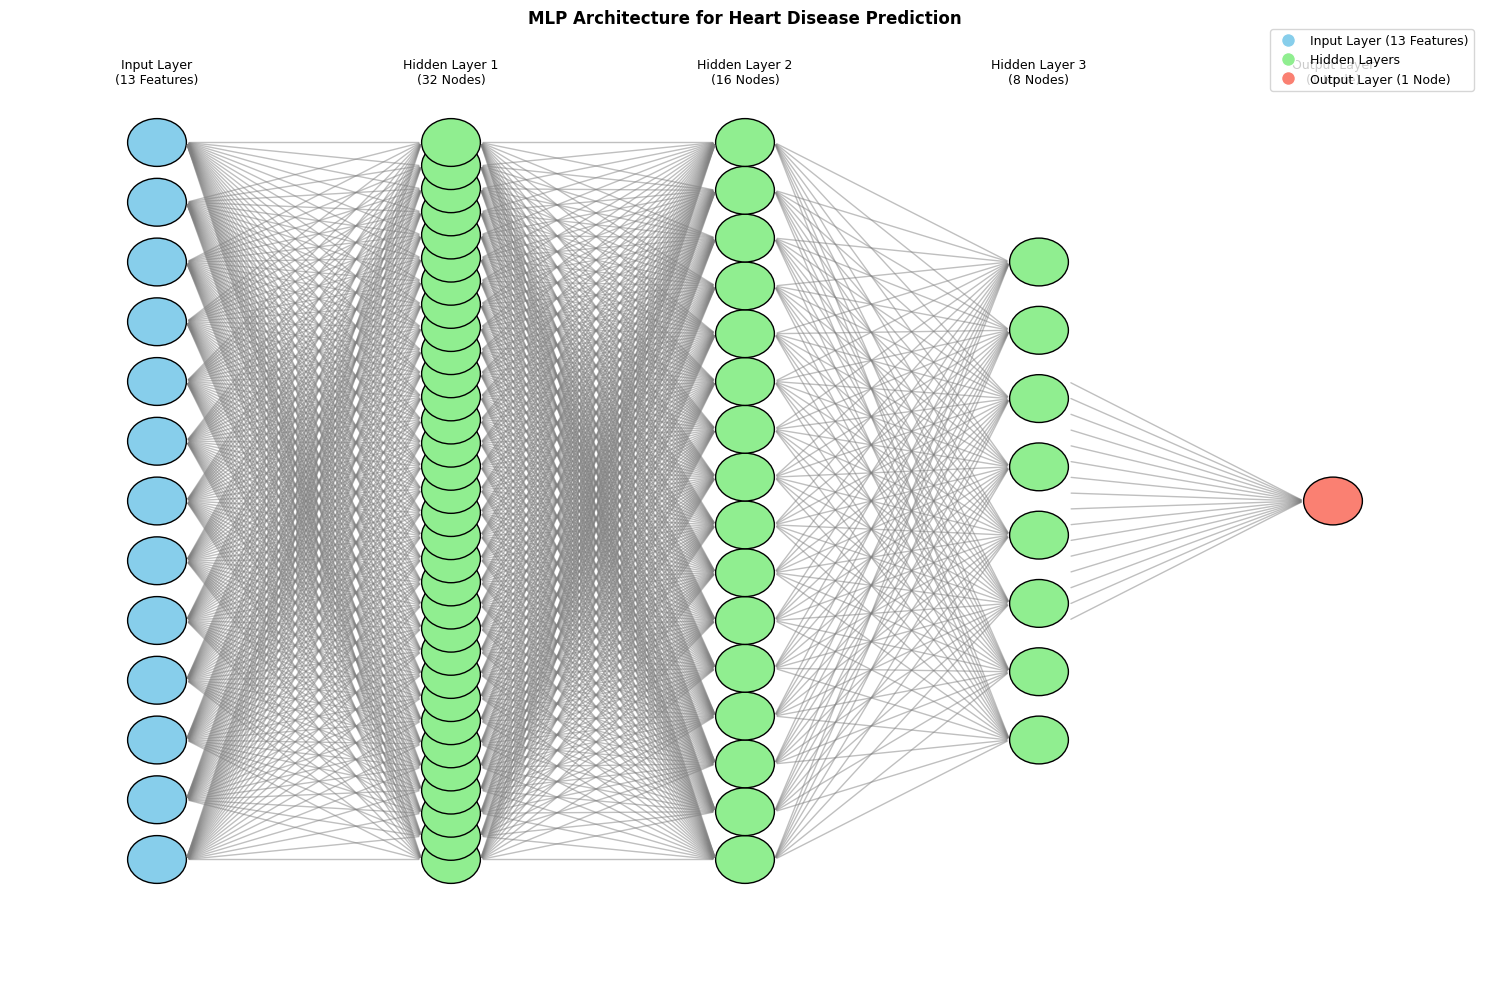

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle, FancyArrowPatch

# Setup figure
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_xlim(0, 10)
ax.set_ylim(0, 8)
ax.axis('off')

# Configuration
num_input_nodes = 13  # Number of input features
num_hidden1 = 32      # Number of nodes in hidden layer 1
num_hidden2 = 16      # Number of nodes in hidden layer 2
num_hidden3 = 8     # Number of nodes in hidden layer 3      
num_output = 1        # Number of output nodes
layer_spacing = 2     # Spacing between layers
node_radius = 0.2     # Radius of each node

# Colors
input_color = 'skyblue'
hidden_color = 'lightgreen'
output_color = 'salmon'
connection_color = 'gray'

# Draw Input Layer
input_layer_x = 1
input_nodes_y = np.linspace(1, 7, num_input_nodes)
for y in input_nodes_y:
    ax.add_patch(Circle((input_layer_x, y), node_radius, facecolor=input_color, edgecolor='black'))
ax.text(input_layer_x, 7.5, "Input Layer\n(13 Features)", ha='center', fontsize=9)

# Draw Hidden Layer 1
hidden1_x = input_layer_x + layer_spacing
hidden1_y = np.linspace(1, 7, num_hidden1)
for y in hidden1_y:
    ax.add_patch(Circle((hidden1_x, y), node_radius, facecolor=hidden_color, edgecolor='black'))
ax.text(hidden1_x, 7.5, "Hidden Layer 1\n(32 Nodes)", ha='center', fontsize=9)

# Draw Hidden Layer 2
hidden2_x = hidden1_x + layer_spacing
hidden2_y = np.linspace(1, 7, num_hidden2)
for y in hidden2_y:
    ax.add_patch(Circle((hidden2_x, y), node_radius, facecolor=hidden_color, edgecolor='black'))
ax.text(hidden2_x, 7.5, "Hidden Layer 2\n(16 Nodes)", ha='center', fontsize=9)

# Draw Hidden Layer 3
hidden3_x = hidden2_x + layer_spacing
hidden3_y = np.linspace(2, 6, num_hidden3)
for y in hidden3_y:
    ax.add_patch(Circle((hidden3_x, y), node_radius, facecolor=hidden_color, edgecolor='black'))
ax.text(hidden3_x, 7.5, "Hidden Layer 3\n(8 Nodes)", ha='center', fontsize=9)


# Draw Output Layer
output_x = hidden3_x + layer_spacing
output_y = 4
ax.add_patch(Circle((output_x, output_y), node_radius, facecolor=output_color, edgecolor='black'))
ax.text(output_x, 7.5, "Output Layer\n(1 Node)", ha='center', fontsize=9)

# Draw Connections (Input to Hidden Layer 1)
for y_in in input_nodes_y:
    for y_hid in hidden1_y:
        ax.add_patch(FancyArrowPatch((input_layer_x + node_radius, y_in), 
                                     (hidden1_x - node_radius, y_hid),
                                     arrowstyle='-', mutation_scale=8, color=connection_color, alpha=0.5))

# Draw Connections (Hidden Layer 1 to Hidden Layer 2)
for y1 in hidden1_y:
    for y2 in hidden2_y:
        ax.add_patch(FancyArrowPatch((hidden1_x + node_radius, y1), 
                                     (hidden2_x - node_radius, y2),
                                     arrowstyle='-', mutation_scale=8, color=connection_color, alpha=0.5))

# Draw Connections (Hidden Layer 2 to Hidden Layer 3)
for y2 in hidden2_y:
    for y3 in hidden3_y:
        ax.add_patch(FancyArrowPatch((hidden2_x + node_radius, y2), 
                                     (hidden3_x - node_radius, y3),
                                     arrowstyle='-', mutation_scale=8, color=connection_color, alpha=0.5))


# Draw Connections (Hidden Layer 4 to Output)
for y4 in hidden4_y:
    ax.add_patch(FancyArrowPatch((hidden3_x + node_radius, y4), 
                                 (output_x - node_radius, output_y),
                                 arrowstyle='-', mutation_scale=8, color=connection_color, alpha=0.5))

# Add Title
plt.text(5, 8, "MLP Architecture for Heart Disease Prediction", ha='center', fontsize=12, weight='bold')

# Add Legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Input Layer (13 Features)',
               markerfacecolor=input_color, markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Hidden Layers',
               markerfacecolor=hidden_color, markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Output Layer (1 Node)',
               markerfacecolor=output_color, markersize=10)
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=9)

# Save and Show
plt.tight_layout()
plt.savefig('mlp_architecture.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
# Use the existing dataset from the notebook
data = data.copy()

# Features and target
X = data.drop("target", axis=1)  # Replace 'target' with your actual label column
y = data["target"]

# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# MLP Model
model = Sequential()
model.add(Dense(64, input_dim=13, activation='relu'))  # Input + First hidden layer
model.add(Dense(32, activation='relu'))               # Second hidden layer
model.add(Dense(16, activation='relu'))               # Third hidden layer
model.add(Dense(1, activation='sigmoid'))             # Output layer

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/100
52/52 [==============================] - 1s 7ms/step - loss: 0.5676 - accuracy: 0.7415 - val_loss: 0.4647 - val_accuracy: 0.7854
Epoch 2/100
52/52 [==============================] - 0s 3ms/step - loss: 0.3520 - accuracy: 0.8683 - val_loss: 0.4139 - val_accuracy: 0.7951
Epoch 3/100
52/52 [==============================] - 0s 3ms/step - loss: 0.2948 - accuracy: 0.8744 - val_loss: 0.3741 - val_accuracy: 0.7902
Epoch 4/100
52/52 [==============================] - 0s 3ms/step - loss: 0.2563 - accuracy: 0.9061 - val_loss: 0.3542 - val_accuracy: 0.8098
Epoch 5/100
52/52 [==============================] - 0s 3ms/step - loss: 0.2307 - accuracy: 0.9012 - val_loss: 0.3281 - val_accuracy: 0.8049
Epoch 6/100
52/52 [==============================] - 0s 3ms/step - loss: 0.2068 - accuracy: 0.9098 - val_loss: 0.3028 - val_accuracy: 0.8293
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: 0.1851 - accuracy: 0.9220 - val_loss: 0.2679 - val_accuracy: 0.8634
Epoch 8/100
5

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset (e.g., UCI Heart Disease Dataset)
# You can replace this with your actual CSV path
df = pd.read_csv('heart.csv')

# Split features and target
X = df.drop('target', axis=1)  # Replace 'target' with your target column
y = df['target']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Build the MLP model
model = Sequential()
model.add(Dense(32, input_dim=13, activation='relu'))   # Hidden Layer 1
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))                 # Hidden Layer 2
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))                  # Hidden Layer 3
model.add(Dense(1, activation='sigmoid'))               # Output Layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train, epochs=100, batch_size=16,
    validation_split=0.2, callbacks=[early_stop], verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Performance report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


Epoch 1/100
41/41 [==============================] - 2s 9ms/step - loss: 0.6133 - accuracy: 0.6662 - val_loss: 0.5784 - val_accuracy: 0.7378
Epoch 2/100
41/41 [==============================] - 0s 3ms/step - loss: 0.5151 - accuracy: 0.7683 - val_loss: 0.4979 - val_accuracy: 0.7744
Epoch 3/100
41/41 [==============================] - 0s 3ms/step - loss: 0.4228 - accuracy: 0.8277 - val_loss: 0.4517 - val_accuracy: 0.8049
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.3875 - accuracy: 0.8521 - val_loss: 0.4265 - val_accuracy: 0.8049
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.3523 - accuracy: 0.8476 - val_loss: 0.4164 - val_accuracy: 0.8110
Epoch 6/100
41/41 [==============================] - 0s 4ms/step - loss: 0.3303 - accuracy: 0.8613 - val_loss: 0.4111 - val_accuracy: 0.8171
Epoch 7/100
41/41 [==============================] - 0s 4ms/step - loss: 0.3230 - accuracy: 0.8780 - val_loss: 0.4105 - val_accuracy: 0.8171
Epoch 8/100
4

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

# Define the MLP model
model = Sequential([
    Dense(32, input_shape=(13,), activation='relu', name='Hidden_Layer_1'),  # First hidden layer
    Dense(16, activation='relu', name='Hidden_Layer_2'),                     # Second hidden layer
    Dense(8, activation='relu', name='Hidden_Layer_3'),                      # Third hidden layer
    Dense(1, activation='sigmoid', name='Output_Layer')                      # Output layer
])

# Summary (text-based)
model.summary()

# Save the architecture diagram properly
try:
    plot_model(
        model,
        to_file="mlp_architecture.png",  # Updated file name
        show_shapes=True,
        show_layer_names=True,
        dpi=150,  # Higher DPI for clarity
        expand_nested=True  # Makes diagram more readable
    )
except AttributeError as e:
    print(f"An error occurred while plotting the model: {e}")
    print("Ensure that 'pydot' and 'graphviz' are installed and properly configured.")

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden_Layer_1 (Dense)      (None, 32)                448       
                                                                 
 Hidden_Layer_2 (Dense)      (None, 16)                528       
                                                                 
 Hidden_Layer_3 (Dense)      (None, 8)                 136       
                                                                 
 Output_Layer (Dense)        (None, 1)                 9         
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
An error occurred while plotting the model: module 'pydot' has no attribute 'InvocationException'
Ensure that 'pydot' and 'graphviz' are installed and pro

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset (e.g., UCI Heart Disease Dataset)
# You can replace this with your actual CSV path
df = pd.read_csv('heart.csv')

# Split features and target
X = df.drop('target', axis=1)  # Replace 'target' with your target column
y = df['target']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Build the MLP model
model = Sequential()
model.add(Dense(32, input_dim=13, activation='relu'))   # Hidden Layer 1
model.add(Dense(16, activation='relu'))                 # Hidden Layer 2
model.add(Dense(8, activation='relu'))                  # Hidden Layer 3
model.add(Dense(1, activation='sigmoid'))               # Output Layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train, epochs=100, batch_size=16,
    validation_split=0.2, callbacks=[early_stop], verbose=1
)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

# Performance report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_classes))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))


Epoch 1/100
41/41 [==============================] - 1s 9ms/step - loss: 0.6893 - accuracy: 0.5518 - val_loss: 0.6737 - val_accuracy: 0.6402
Epoch 2/100
41/41 [==============================] - 0s 4ms/step - loss: 0.6245 - accuracy: 0.7591 - val_loss: 0.6151 - val_accuracy: 0.7500
Epoch 3/100
41/41 [==============================] - 0s 4ms/step - loss: 0.5059 - accuracy: 0.8354 - val_loss: 0.5257 - val_accuracy: 0.7805
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 0.3870 - accuracy: 0.8567 - val_loss: 0.4939 - val_accuracy: 0.7744
Epoch 5/100
41/41 [==============================] - 0s 3ms/step - loss: 0.3209 - accuracy: 0.8796 - val_loss: 0.4898 - val_accuracy: 0.7988
Epoch 6/100
41/41 [==============================] - 0s 3ms/step - loss: 0.2943 - accuracy: 0.8963 - val_loss: 0.4835 - val_accuracy: 0.7988
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 0.2740 - accuracy: 0.8887 - val_loss: 0.4734 - val_accuracy: 0.8171
Epoch 8/100
4